# **1. PROBLEMA**

## **1.1. Contexto**

**Dataset:**

El siguiente conjunto de datos contiene información de casas en venta dentro de la Región Metropolitana. Los datos fueron extraídos a través de web scrapping desde https://chilepropiedades.cl/. Este dataset solo contiene CASAS en venta. No incluye departamentos o terrenos.

El conjunto de datos ya fue preprocesado por lo que está listo para su uso.

FUENTE: https://www.kaggle.com/datasets/luisfelipetn/valor-casas-usadas-chile-rm-08032023/code

**Objetivo:**

> Predecir el estado de la casa (en venta o vendida)

**Desarrollo:**

➡️ Identifique las variables dependientes e independientes.

➡️ Realizar una separación del dataset en conjuntos de entrenamiento y prueba para validar los resultados de los modelos de Clasificación.

➡️ Experimente con distintos modelos de Clasificación para realizar sus predicciones.

➡️ Evalúe el nivel de error y exactitud de cada modelo.

➡️ Compare los modelos realizados y elija el modelo ganador con base en los criterios de la etapa de evaluación.

➡️ Realice un pronóstico de la variable objetivo con el modelo ganador, cargando datos nuevos no utilizados en el proceso de entrenamiento y validación de los modelos.

➡️ Interprete sus resultados.

**Diccionario de variables:**

*   Precio_CLP: Precio de casa en pesos chilenos (CLP)
*   Precio_UF: Precio de casa en unidades de fomento (UF)
*   Ubicacion: Ubicación más específica de la casa
*   N_Habitaciones: Cuantas habitaciones tiene la casa
*   N_Baños: Cuantos baños tiene la casa
*   Superficie_Construida_M2: Cuantos metros cuadrados construidos tiene la casa
*   Total_Superficie_M2: Cuantos metros cuadrados tiene toda la propiedad
*   N_Estacionamientos: Cuantos estacionamentos tiene la casa
*   id: Codigo de la casa en https://chilepropiedades.cl/ ; Ej: https://chilepropiedades.cl/ver-publicacion/11607213
*   Corredora: El corredor de bienes raíces
*   Estado: Estado de la publicación de la casa, EN VENTA (0) o VENDIDA (1).
*   Comuna: Comuna en la que se encuentra la casa.

Valor Codificado - Clase:

*   	1	 - 	 Buin
*   	2	 - 	 CaleradeTango
*   	3	 - 	 Cerrillos
*   	4	 - 	 CerroNavia
*   	5	 - 	 Colina
*   	6	 - 	 Conchali
*   	7	 - 	 Curacavi
*   	8	 - 	 ElBosque
*   	9	 - 	 ElMonte
*   	10	 - 	 EstacionCentral
*   	11	 - 	 Huechuraba
*   	12	 - 	 Independencia
*   	13	 - 	 IsladeMaipo
*   	14	 - 	 LaCisterna
*   	15	 - 	 LaFlorida
*   	16	 - 	 LaGranja
*   	17	 - 	 LaPintana
*   	18	 - 	 LaReina
*   	19	 - 	 Lampa
*   	20	 - 	 LasCondes
*   	21	 - 	 LoBarnechea
*   	22	 - 	 LoEspejo
*   	23	 - 	 LoPrado
*   	24	 - 	 Macul
*   	25	 - 	 Maipu
*   	26	 - 	 MariaPinto
*   	27	 - 	 Melipilla
*   	28	 - 	 PadreHurtado
*   	29	 - 	 Paine
*   	30	 - 	 PedroAguirreCerda
*   	31	 - 	 Peñaflor
*   	32	 - 	 Peñalolen
*   	33	 - 	 Pirque
*   	34	 - 	 Providencia
*   	35	 - 	 Pudahuel
*   	36	 - 	 PuenteAlto
*   	37	 - 	 Quilicura
*   	38	 - 	 QuintaNormal
*   	39	 - 	 Recoleta
*   	40	 - 	 Renca
*   	41	 - 	 San Joaquin
*   	42	 - 	 SanBernardo
*   	43	 - 	 SanJoseDeMaipo
*   	44	 - 	 SanMiguel
*   	45	 - 	 SanPedro
*   	46	 - 	 SanRamon
*   	47	 - 	 Santiago
*   	48	 - 	 Talagante
*   	49	 - 	 Tiltil
*   	50	 - 	 Vitacura
*   	51	 - 	 Ñuñoa





---



## **1.2. Librerías**

In [ ]:
#Librerías de Python

import numpy as np #Programación vectorial
import pandas as pd #Estructura y manipulación de datos
import matplotlib.pyplot as plt #Visualización

import seaborn as sb #Gráficos
from seaborn import kdeplot
from seaborn import lmplot
from seaborn import boxplot

import warnings #Advertencias
warnings.filterwarnings('ignore')

## **1.3. Carga de datos**

**Opción 1:** Subir el archivo a Colab directamente en la carpeta "Archivos". (Advertencia: El archivo se elimina luego que se desconecta el entorno de ejecución por lo que no es recomendable para tareas que requieren mucho tiempo de trabajo)

In [ ]:
data = pd.read_excel("Guia_Modelos_de_Clasificacion.xlsx")

**Opción 2:** Abrir un archivo local desde el computador

In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    name=fn
data = pd.read_excel("Guia_Modelos_de_Clasificacion.xlsx")

Saving Guia_Machine_Learning.csv to Guia_Machine_Learning.csv


**Opción 3:** Importar desde Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_excel("/content/drive/My Drive/MATERIAL CLASES/Data Analytics/Guia_Modelos_de_Clasificacion.xlsx")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Primero revisamos cuantos registros (filas) y cuántas variables (columnas) tiene el set de datos:

In [ ]:
#Cantidad de filas x cantidad de columnas
print(data.shape)

(16813, 9)


Visualización del dataset:

In [ ]:
#Registro aleatorio
data.sample(10)

,Precio_CLP,Precio_UF,Comuna,N_Habitaciones,N_Baños,Superficie_Construida_M2,Total_Superficie_M2,N_Estacionamientos,Estado
1342,80000000,2217.0,8,3,2,112,162.0,1,0
13760,220000000,6180.0,47,6,3,329,675.5,0,0
4119,177950000,5000.0,36,3,3,125,156.0,2,0
8249,90398600,2540.0,10,3,1,146,200.0,0,0
6162,891012625,24677.5,21,5,3,329,229.0,5,0
9245,133131510,3690.0,36,3,2,117,163.0,1,1
6254,309633000,8700.0,44,4,3,200,450.0,2,0
5115,354120500,9950.0,5,3,3,120,400.0,2,0
1842,708241000,19900.0,20,4,4,192,192.0,4,0
4415,220000000,6180.0,5,5,3,133,229.0,4,0


Transformamos el set de datos en un `dataframe` de Pandas para poder realizar modificaciones a los datos:

In [ ]:
#Transformacion a Data Frame
df = pd.DataFrame(data)

In [ ]:
#Resumen
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16813 entries, 0 to 16812
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precio_CLP                16813 non-null  int64  
 1   Precio_UF                 16813 non-null  float64
 2   Comuna                    16813 non-null  int64  
 3   N_Habitaciones            16813 non-null  int64  
 4   N_Baños                   16813 non-null  int64  
 5   Superficie_Construida_M2  16813 non-null  int64  
 6   Total_Superficie_M2       16813 non-null  float64
 7   N_Estacionamientos        16813 non-null  int64  
 8   Estado                    16813 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 1.2 MB


▶ Correlación

La correlación indica cuán asociadas se encuentran dos variables entre sí. Esta medida tiene un rango entre 1 y -1, donde:

1 = las variables se relacionan de forma directa.

0 = las variables no se relacionan.

-1 = las variables se relacionan inversamente.

Entre más cercano a cero sea la correlación, más débil es la relación entre las variables, en cambio entre más cercano a 1 (sea positivo o negativo), más fuerte es la relación.

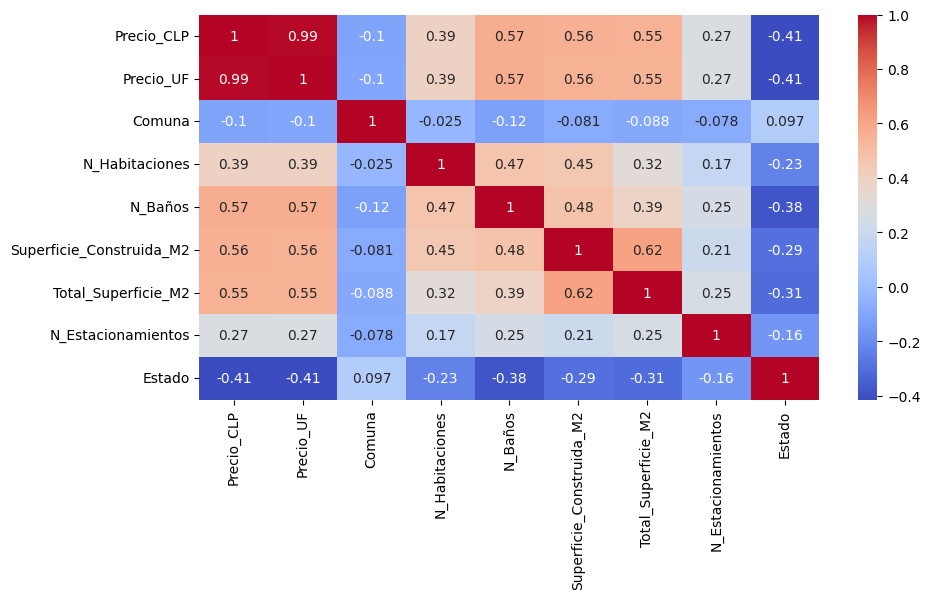

In [ ]:
corr = df.corr()
plt.figure(figsize=(10,5))
sb.heatmap(corr, cmap="coolwarm",annot=True)
plt.show()

Las variable 'Precio_UF' y 'Precio_CLP' están demasiado correlacionadas debido a que una es cálculo de la otra, por lo tanto se debe elegir solo una para hacer predicciones. En este caso se elige Precio_UF.

In [ ]:
#Correlacion de todas las variables con precio
corr_matrix = df.corr()
corr_matrix["Precio_UF"].sort_values(ascending=False)

Precio_UF                   1.00
Precio_CLP                  0.99
N_Baños                     0.57
Superficie_Construida_M2    0.56
Total_Superficie_M2         0.55
N_Habitaciones              0.39
N_Estacionamientos          0.27
Comuna                     -0.10
Estado                     -0.41
Name: Precio_UF, dtype: float64

# **2. MODELADO**

Se busca predecir las clases de una variable objetivo (target), utilizando una variable dependiente $Y$ de tipo categórica binaria (con 2 clases) 'Estado', la cual fue transformada en la etapa anterior obteniendo 'EN VENTA' como clase negativa (0) y 'VENDIDA' (1) como clase positiva.

In [ ]:
#Librerías de Python

import numpy as np #Programación vectorial
import pandas as pd #Estructura y manipulación de datos
import matplotlib.pyplot as plt #Visualización

import seaborn as sb #Gráficos

import warnings #Advertencias
warnings.filterwarnings('ignore')

In [ ]:
# Importación del dataset preprocesado
df = pd.read_excel("Guia_ML_Preprocesado.xlsx")

In [ ]:
#Revisamos la proporcion en que se encuentra cada clase:
print(df.groupby('Estado').size())

Estado
0    13417
1     3396
dtype: int64


Como se puede ver, las clases se encuentran desbalanceadas.

### **2.1. Regresión Logística**

➡️ `LogisticRegression()`: Se utiliza para realizar regresión logística, que es un algoritmo de clasificación binaria y multinomial. Esta clase implementa un modelo de regresión logística que se utiliza comúnmente para problemas de clasificación.

Parámetros:

> ●   `penalty`: Controla la regularización aplicada al modelo. Puede ser "l1", "l2", "elasticnet" o "none". La regularización ayuda a prevenir el sobreajuste. (predeterminado='l2')

> ●   `C`:  Inverso de la fuerza de regularización. Un valor más bajo de C implica una regularización más fuerte. Este parámetro permite controlar el equilibrio entre ajustar el modelo a los datos de entrenamiento y evitar el sobreajuste. (predeterminado=1.0)

> ●   `fit_intercept`: Si es True, se ajustará una constante (intercepto) al modelo. Si es False, no se ajustará un intercepto. (predeterminado=True)

> ●   `solver`: El algoritmo utilizado para optimizar los parámetros del modelo. Puede ser 'newton-cg', 'lbfgs', 'liblinear', 'sag' o 'saga'. La elección del solucionador puede afectar el rendimiento y la velocidad del modelo. (predeterminado='lbfgs')

> ●   `max_iter`: El número máximo de iteraciones permitidas para que el solucionador converja. (predeterminado=100)

> ●   `multi_class`: Controla cómo se manejan las clases en problemas de clasificación multiclase. Puede ser 'ovr' (One-Versus-Rest) o 'multinomial'. 'auto' ajusta automáticamente el enfoque en función del problema. (predeterminado='auto')

> ●   `tol`: Tolerancia para la convergencia del algoritmo.  (predeterminado=1e-4)

> ●   `class_weight`: Puede ser utilizado para asignar pesos a las clases en el modelo. Es útil cuando las clases están desequilibradas, donde se puede asignar un ratio o la opción automática 'balanced' para balancear los pesos de las clases. (predeterminado=None)

> ●   `random_state`: Semilla aleatoria para reproducibilidad de los resultados. (predeterminado=None)

####**Modelo 1**

✅ Paso 1 - Definición de variables: Definimos la variable objetivo $Y$ y las variables predictoras $X$.

In [ ]:
#Variable dependiente
Y = pd.DataFrame(df['Estado'])
Y.sample(5)

,Estado
3250,1
569,0
13214,0
15724,0
7305,0


In [ ]:
#Variables independientes
X = df.drop(columns=['Estado','Precio_CLP'])
X.sample(5)

,Precio_UF,Comuna,N_Habitaciones,N_Baños,Superficie_Construida_M2,Total_Superficie_M2,N_Estacionamientos
8967,4990.0,5,3,2,95,414.0,0
11296,8500.0,24,3,1,100,200.0,0
11010,7390.0,20,3,2,83,144.0,0
13589,9160.0,39,6,2,228,558.0,0
3209,4000.0,19,3,3,84,133.0,2


➡️ `Split`: Se mejora el modelo realizando una separación (split) del set de datos en *conjunto de entrenamiento* y *conjunto de prueba*. Con esta partición el set de datos quedará dividido en 4 secciones: *Xtrain, Xtest, Ytrain, Ytest*.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Se define una proporcion 70/30, es decir un tamaño del conjunto de prueba de 0.3 (30%)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3, random_state=123)

In [ ]:
#Conjunto de entrenamiento
print(Xtrain.shape)
print(Ytrain.shape)

(11769, 7)
(11769, 1)


In [ ]:
#Conjunto de prueba
print(Xtest.shape)
print(Ytest.shape)

(5044, 7)
(5044, 1)


✅ Paso 2 - Modelo: Creación del modelo de Regresión Logística.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
modelo_c1 = LogisticRegression()

✅ Paso 3 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain y Ytrain.

In [ ]:
modelo_c1.fit(Xtrain, Ytrain)

LogisticRegression()

✅ Paso 4 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest. Como resultado obtenemos $\hat Y$ (Y_hat).

Se pone a prueba el modelo realizando una predicción con datos fuera de la muestra (out-of-sample).

➡️ `out-of-sample`: Predicción con datos que no han sido utilizados durante el entrenamiento del modelo. Esto se hace para evaluar cómo se desempeña el modelo con datos desconocidos, como lo son los datos del conjunto de prueba (Xtest), los cuales utilizamos para validar el modelo.

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_c1.predict(Xtest)

In [ ]:
Ytest = Ytest.rename(columns={'Estado': 'Observación (Y)'})
Y_hat = pd.DataFrame(Y_hat, columns = ['Estimación (Ŷ)'])
Comparacion = pd.merge(Ytest, Y_hat, left_index=True, right_index=True)
Comparacion.head(10)

,Observación (Y),Estimación (Ŷ)
3137,1,1
4197,1,0
4943,0,1
1913,0,0
1205,1,0
1717,0,1
4196,0,1
3769,0,0
2419,0,1
2481,0,1


✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas derivadas de la matriz de confusión.

➡️ Matriz de Confusión: Es una tabla resumida que se utiliza para evaluar el rendimiento de un modelo de clasificación. El número de predicciones correctas e incorrectas se resumen con los valores de conteo y se desglosan por cada clase. Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias de la clase real.

Para una variable categórica binaria se tienen 2 clases de $Y$:
*   *Positiva (P)*: La observación es positiva (1).
*   *Negativa (N)*: La observación NO es positiva (0).

De estas clases se derivan 4 resultados posibles que se derivan del cruce entre los resultados reales $Y$ (observación) y los resultados estimados $\hat Y$ (predicción):
> ●   `Verdadero Positivo (VP)`: Resultado donde el modelo predice correctamente la clase positiva.

> ●   `Falso Positivo (FP o error de tipo I)`: Resultado donde el modelo predice incorrectamente la clase positiva cuando en realidad es negativa.

> ●   `Verdadero Negativo (VN)`: Resultado donde el modelo predice correctamente la clase negativa.

> ●   `Falso Negativo (FN o error de tipo II)`: Resultado en el que el modelo predice incorrectamente la clase negativa cuando en realidad es positiva.

Estos resultados 4 resultados se resumen en la matriz de confusión:

In [ ]:
print("    | 0 | VN | FP |")
print(" (Y)| 1 | FN | VP |")
print("    ----|----|----|")
print("        | 0  |  1 |")
print("            (Ŷ)    ")

    | 0 | VN | FP |
 (Y)| 1 | FN | VP |
    ----|----|----|
        | 0  |  1 |
            (Ŷ)    


Cada resultado corresponde a un cuadrante de la matriz:
*   VP = [1][1] -> La clase real es 1 y el modelo estima 1
*   FP = [0][1] -> La clase real es 0 y el modelo estima 1
*   VN = [0][0] -> La clase real es 0 y el modelo estima 0
*   FN = [1][0] -> La clase real es 1 y el modelo estima 0

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
#Matriz de confusion
matriz = confusion_matrix(Ytest, Y_hat)
matriz

array([[3518,  462],
       [ 656,  408]])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

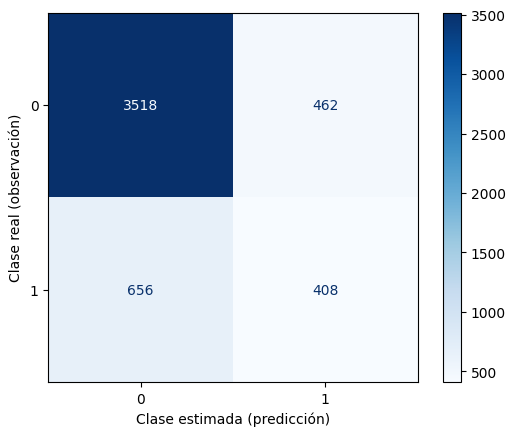

In [ ]:
grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_c1.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

Verdaderos positivos (VP): 408
Falsos positivos (FP): 462
Verdaderos negativos (VN): 3518
Falsos negativos (FN): 656


Una vez realizada la matriz de confusión, se pueden calcular un conjunto de métricas que relacionan los resultados de la matriz con el desempeño del modelo, donde se mide la diferencia entre la clase real (observación) de la variable objetivo $Y$ y la clase estimada (predicción) de ésta $\hat Y$.
Todas estas métricas son ratios que permiten realizar comparaciones entre varios modelos.

➡️ Métricas de error: El resultado de estas métricas fluctúan entre 0 y 1. Una puntuación más cercana a 0 indica un mejor modelo (con menor error) y viceversa.

> ●   `Tasa de FP`: Es la probabilidad de que se produzca una falsa alarma, es decir, que se dé un resultado positivo cuando el valor verdadero sea negativo. Se le conoce como 'Error de tipo I'.

               FP/(FP+VN)

> ●   `Tasa de FN`: Es la probabilidad de que el algoritmo pase por alto los verdaderos positivos. Se le conoce como 'Error de tipo II'.

               FN/(FN+VP)

In [ ]:
#Tasa de error
Tasa_FP_1 = FP/(FP+VN)
Tasa_FN_1 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_1 )
print("Error tipo II: %.2f" % Tasa_FN_1 )

Error tipo I: 0.12
Error tipo II: 0.62


➡️ Métricas de desempeño: El resultado de estas métricas fluctúan entre 0 y 1. Una puntuación más cercana a 1 indica un mejor modelo  y viceversa.

> ●   `Accuracy`: Exactitud del modelo. Mide la proporción de predicciones que el modelo clasificó correctamente. Es una medida global de desempeño para todas las clases (positivas y negativas).

               (VP+VN)/(VP+FP+FN+VN)

> ●   `Precision`: Indica la dispersión del conjunto de valores obtenidos a partir de mediciones repetidas de una magnitud. Cuanto menor es la dispersión mayor la precisión. Muestra la proporción de clases positivas correctamente detectadas entre todos los resultados positivos estimados, sean verdaderos o falsos (VP y FP). Es útil únicamente cuando se tienen clases balanceadas (la cantidad de casos de la clase 0 y de las clase 1 tienen magnitudes similares)

                    VP/(VP+FP)

Para clasificación binaria, la métrica `Recall` tiene dos lecturas:

> ●   `Sensitivity`: Para la clase positiva indica la tasa de verdaderos positivos (VP). Es la proporción de casos positivos que fueron correctamente identificadas por el algoritmo.

                    VP/(VP+FN)

> ●   `Specificity`: Para la clase negativa indica la tasa de verdaderos negativos (VN). Es la proporción de casos negativos que fueron correctamente identificadas por el algoritmo.

                    VN/(VN+FP)

> ●   `F1-score`: Combina Precision y Recall en una sola métrica, calculando la media armónica entre ambas. Es útil si se  tiene una distribución de clases desigual (desbalanceada).

          2 x Precision x Recall/(Precision x Recall)

Conforme a estas métricas podemos obtener  cuatro casos posibles para cada clase:

1. Alta precisión y alto recall: el modelo de Machine Learning escogido maneja perfectamente esa clase.

2. Alta precisión y bajo recall: el modelo de Machine Learning escogido no detecta la clase muy bien, pero cuando lo hace es altamente confiable.

3. Baja precisión y alto recall: El modelo de Machine Learning escogido detecta bien la clase,  pero también incluye muestras de la otra clase.

4. Baja precisión y bajo recall: El modelo de Machine Learning escogido no logra clasificar la clase correctamente.

Cuando tenemos un conjunto de datos desbalanceado, suele ocurrir que obtenemos un alto valor de precisión en la clase mayoritaria y un bajo recall en la clase minoritaria y por ello tenemos que recurrir al balanceo de clases.

✅ Recomendaciones:

▶ Elija mayor Precisión si quiere estar más seguro de sus verdaderos positivos.

▶ La Sensibilidad le servirá para saber si no está perdiendo positivos.

▶ Utilice una Sensibilidad alta cuando la aparición de falsos negativos le resulta inaceptable pero no le importa tener falsos positivos adicionales (falsas alarmas).

▶ Elija alta Especificidad si desea identificar los verdaderos negativo o cuando no desea falsos positivos.

➡️ Otras métricas: El reporte de clasificación que muestra python contiene las métricas vistas anteriormente y además, otras métricas que sirven de guía:

`Support` es la cantidad total de registros de cada clase, la cual debe coincidir con las proporciones calculadas inicialmente.

`Macro avg` indica el promedio de cada métrica para ambas clases.

`Weighted avg` indica el promedio ponderado de cada métrica para ambas clases, considerando la proporción de las clases. Si la proporción de las clases son equilibradas, *macro avg* y *weighted avg* serán iguales. En cambio, si la proporcion de las clases es muy desigual, las metricas de *macro avg* y *weighted avg* serán distintas.

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
#Tabla resumen
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      3980
           1       0.47      0.38      0.42      1064

    accuracy                           0.78      5044
   macro avg       0.66      0.63      0.64      5044
weighted avg       0.76      0.78      0.77      5044



In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#Accuracy
SCORE_1 = accuracy_score(Ytest,Y_hat)
print("ACCURACY: %.2f" % SCORE_1 )

ACCURACY: 0.78


El modelo a pesar de tener un buen Accuracy (78%), tgiene una tasa de Error tipo II demasiado alta (62%), lo que implica que el modelo no es capaz de clasificar correctamente la clase minoritaria correspondiente a la clase positiva (1), sólo es capaz de predecir con mayor exactitud la clase negativa (0) al ser la clase mayoritaria.

Con esto se hace evidente que Accuracy no es la mejor métrica para evaluar el desempeño global del modelo. Al estar las clases muy desbalanceadas, Accuracy muestra una medida engañosa de la realidad, ya que no considera los errores.

La mejor métrica para medir la exactitud del modelo para casos de clases desbalanceadas es F1-Score.

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
#F1-Score
f1_1 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_1 )

F1-Score: 0.42


####**Modelo 2**

✅ Paso 1 - Definición de Variables: Utilizamos las variables $X$ e $Y$ previamente definidas y divididas en conjunto de entrenamiento y test.

➡️ `Normalización`: Se transforman los datos para que sigan una distribución *normal estándar*. La normalización hace que los rangos de valores que puede tomar una serie de datos de una variable sea similar, para que no exista una variable que tenga mayor influencia que otra.

---
⚠️ **NOTA** ⚠️

> ✔️ Se normaliza solamente la variable $X$.

> ⛔ La variable $Y$ no debe ser normalizada ya que perderíamos la información de cada clase.
---

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

scaler.fit(Xtrain)
Xtrain_sc= scaler.transform(Xtrain)

scaler.fit(Xtest)
Xtest_sc= scaler.transform(Xtest)

✅ Paso 2 - Modelo: Creación del modelo de Regresión Logística.

In [ ]:
modelo_c2 = LogisticRegression(class_weight='balanced', random_state=123)

✅ Paso 3 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain normalizada y Ytrain.

In [ ]:
modelo_c2.fit(Xtrain_sc, Ytrain)

LogisticRegression(class_weight='balanced', random_state=123)

✅ Paso 4 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest normalizada. Como resultado obtenemos $\hat Y$ (Y_hat).

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_c2.predict(Xtest_sc)

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas derivadas de la matriz de confusión.

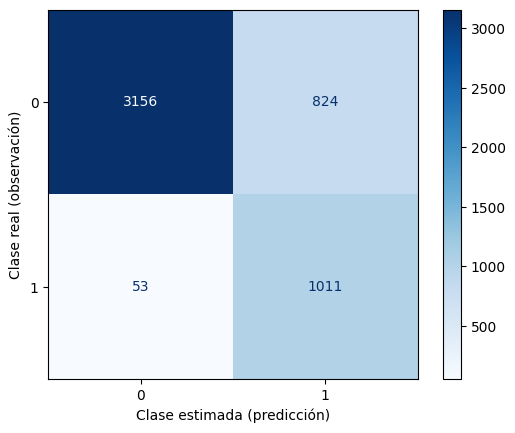

In [ ]:
#Matriz de confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_c2.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

Verdaderos positivos (VP): 1011
Falsos positivos (FP): 824
Verdaderos negativos (VN): 3156
Falsos negativos (FN): 53


In [ ]:
#Tasa de error
Tasa_FP_2 = FP/(FP+VN)
Tasa_FN_2 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_2 )
print("Error tipo II: %.2f" % Tasa_FN_2 )

Error tipo I: 0.21
Error tipo II: 0.05


In [ ]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88      3980
           1       0.55      0.95      0.70      1064

    accuracy                           0.83      5044
   macro avg       0.77      0.87      0.79      5044
weighted avg       0.89      0.83      0.84      5044



In [ ]:
#Accuracy
SCORE_2 = accuracy_score(Ytest,Y_hat)
print("ACCURACY: %.2f" % SCORE_2 )

#F1-Score
f1_2 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_2 )

ACCURACY: 0.83
F1-Score: 0.70


   🟠  ¡Ahora es tu turno de interpretar los resultados!  🟠

####**Modelo 3**

✅ Paso 1 - Definición de Variables: Utilizamos las variables $X$ e $Y$ previamente definidas y divididas en conjunto de entrenamiento y test.

✅ Paso 2 - Modelo: Creación del modelo de Regresión Logística.

In [ ]:
modelo_c3 = LogisticRegression(penalty='l1', C=0.5, solver='liblinear', class_weight={0: 1, 1: 5}, random_state=123)

✅ Paso 3 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain normalizada y Ytrain.

In [ ]:
modelo_c3.fit(Xtrain_sc, Ytrain)

LogisticRegression(C=0.5, class_weight={0: 1, 1: 5}, penalty='l1',
                   random_state=123, solver='liblinear')

✅ Paso 4 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest normalizada. Como resultado obtenemos $\hat Y$ (Y_hat).

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_c3.predict(Xtest_sc)

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas derivadas de la matriz de confusión.

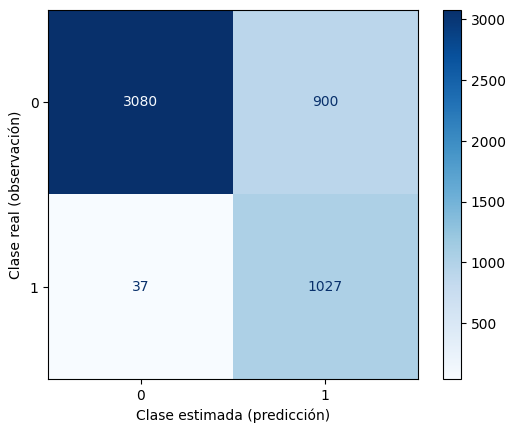

In [ ]:
#Matriz de confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_c3.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

Verdaderos positivos (VP): 1027
Falsos positivos (FP): 900
Verdaderos negativos (VN): 3080
Falsos negativos (FN): 37


In [ ]:
#Tasa de error
Tasa_FP_3 = FP/(FP+VN)
Tasa_FN_3 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_3 )
print("Error tipo II: %.2f" % Tasa_FN_3 )

Error tipo I: 0.23
Error tipo II: 0.03


In [ ]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       0.99      0.77      0.87      3980
           1       0.53      0.97      0.69      1064

    accuracy                           0.81      5044
   macro avg       0.76      0.87      0.78      5044
weighted avg       0.89      0.81      0.83      5044



In [ ]:
#Accuracy
SCORE_3 = accuracy_score(Ytest,Y_hat)
print("ACCURACY: %.2f" % SCORE_3 )

#F1-Score
f1_3 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_3 )

ACCURACY: 0.81
F1-Score: 0.69


   🟠  ¡Ahora es tu turno de interpretar los resultados!  🟠

####**Modelo 4**

✅ Paso 1 - Definición de Variables: Utilizamos las variables $X$ e $Y$ previamente definidas y divididas en conjunto de entrenamiento y test.

✅ Paso 2 - Modelo: Creación del modelo de Regresión Logística.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 300,400,500,600,700,1000,2000,3000,4000,5000]
}

grid_search = GridSearchCV(
    estimator=LogisticRegression(class_weight='balanced', random_state=123),
    param_grid=param_grid,
    scoring='accuracy',  # Utiliza la métrica de tu elección (precisión, F1-score, etc.)
    cv=5,  # Número de divisiones para la validación cruzada
    verbose=2,  # Controla la cantidad de información que se muestra durante la búsqueda
    n_jobs=-1  # Utiliza todos los núcleos disponibles para acelerar la búsqueda
)

grid_search.fit(Xtrain_sc, Ytrain)
best_params = grid_search.best_params_
best_params

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


{'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
modelo_c4 = LogisticRegression(**best_params, class_weight='balanced', random_state=123)

✅ Paso 3 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain normalizada y Ytrain.

In [ ]:
modelo_c4.fit(Xtrain_sc, Ytrain)

LogisticRegression(C=10, class_weight='balanced', penalty='l1',
                   random_state=123, solver='liblinear')

✅ Paso 4 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest normalizada. Como resultado obtenemos $\hat Y$ (Y_hat).

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_c4.predict(Xtest_sc)

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas derivadas de la matriz de confusión.

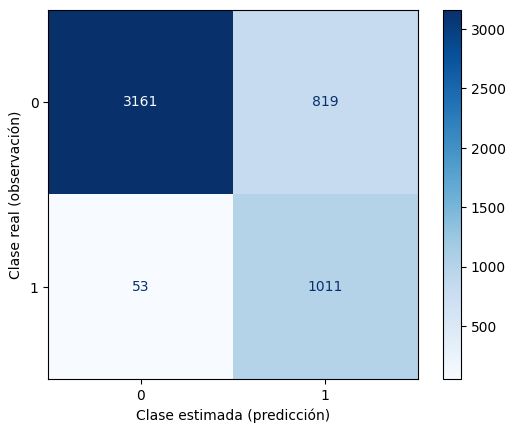

In [ ]:
#Matriz de confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_c4.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

Verdaderos positivos (VP): 1011
Falsos positivos (FP): 819
Verdaderos negativos (VN): 3161
Falsos negativos (FN): 53


In [ ]:
#Tasa de error
Tasa_FP_4 = FP/(FP+VN)
Tasa_FN_4 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_4 )
print("Error tipo II: %.2f" % Tasa_FN_4 )

Error tipo I: 0.21
Error tipo II: 0.05


In [ ]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88      3980
           1       0.55      0.95      0.70      1064

    accuracy                           0.83      5044
   macro avg       0.77      0.87      0.79      5044
weighted avg       0.89      0.83      0.84      5044



In [ ]:
#Accuracy
SCORE_4 = accuracy_score(Ytest,Y_hat)
print("ACCURACY: %.2f" % SCORE_4 )

#F1-Score
f1_4 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_4 )

ACCURACY: 0.83
F1-Score: 0.70


   🟠  ¡Ahora es tu turno de interpretar los resultados!  🟠

### **2.2. Árbol de Decisión**

➡️ `DecisionTreeClassifier()`:  Es un algoritmo de aprendizaje automático que se utiliza para problemas de clasificación. Los árboles de decisión son algoritmos de aprendizaje supervisado que dividen el conjunto de datos en subconjuntos más pequeños basados en las características, con el objetivo de realizar una clasificación.

Parámetros:

> ●   `criterion`: Controla la función utilizada para medir la calidad de una división. Puede ser 'gini' para el índice de Gini o 'entropy' para la ganancia de información. (predeterminado='gini')

> ●   `splitter`:  Especifica la estrategia utilizada para elegir las divisiones en cada nodo del árbol. Puede ser "best" para elegir la mejor división o "random" para elegir una división aleatoria. (predeterminado='best')

> ●   `max_depth`:  Establece la profundidad máxima del árbol. Controla la profundidad máxima de las divisiones y, por lo tanto, la complejidad del árbol. Puede ser un número entero o None para permitir que el árbol crezca hasta que todas las hojas tengan menos de min_samples_split muestras. (predeterminado=None).

> ●   `min_samples_split`:  Es el número mínimo de muestras requeridas para dividir un nodo interno. Puede ser un número entero o un valor flotante que representa una fracción de las muestras totales. (predeterminado=2)

> ●   `min_samples_leaf`:  Es el número mínimo de muestras requeridas para que una hoja sea una hoja válida. Puede ser un número entero o un valor flotante que representa una fracción de las muestras totales. (predeterminado=1)

> ●   `max_features`:  Controla el número máximo de características que se considerarán al buscar la mejor división. Puede ser un número entero, una fracción o una cadena ("auto", "sqrt", "log2"). (predeterminado='auto')

> ●   `min_weight_fraction_leaf`: La fracción mínima ponderada del total de muestras requerida en un nodo hoja. (predeterminado=0)

> ●   `class_weight`: Puede ser utilizado para asignar pesos a las clases en el modelo, útil cuando las clases están desequilibradas, en ese caso se usa 'balanced'. (predeterminado=None)

> ●   `min_impurity_decrease`: Un nodo se dividirá si esta división induce una disminución de la impureza mayor o igual que el valor dado. (predeterminado=0)

> ●   `random_state`:  Permite establecer una semilla para la generación de números aleatorios, lo que garantiza reproducibilidad en los resultados.  (predeterminado=None)

####**Modelo 5**

✅ Paso 1 - Definición de Variables: Utilizamos las variables $X$ e $Y$ previamente definidas, normalizadas y divididas en conjunto de entrenamiento y test.

✅ Paso 2 - Modelo: Creación del modelo de Árbol de Clasificación.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
modelo_c5 = DecisionTreeClassifier()

✅ Paso 3 - Entrenamiento: Entrenamiento del modelo ajustándolo con Ytrain y Xtrain normalizada.

In [ ]:
modelo_c5.fit(Xtrain_sc, Ytrain)

DecisionTreeClassifier()

✅ Paso 4 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest normalizada. Como resultado obtenemos $\hat Y$ (Y_hat).

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_c5.predict(Xtest_sc)

In [ ]:
Ytest = Ytest.rename(columns={'Estado': 'Observación (Y)'})
Y_hat = pd.DataFrame(Y_hat, columns = ['Estimación (Ŷ)'])
Comparacion = pd.merge(Ytest, Y_hat, left_index=True, right_index=True)
Comparacion.head(10)

,Observación (Y),Estimación (Ŷ)
3137,1,0
4197,1,0
4943,0,0
1913,0,0
1205,1,0
1717,0,0
4196,0,0
3769,0,1
2419,0,0
2481,0,0


In [ ]:
from sklearn import tree

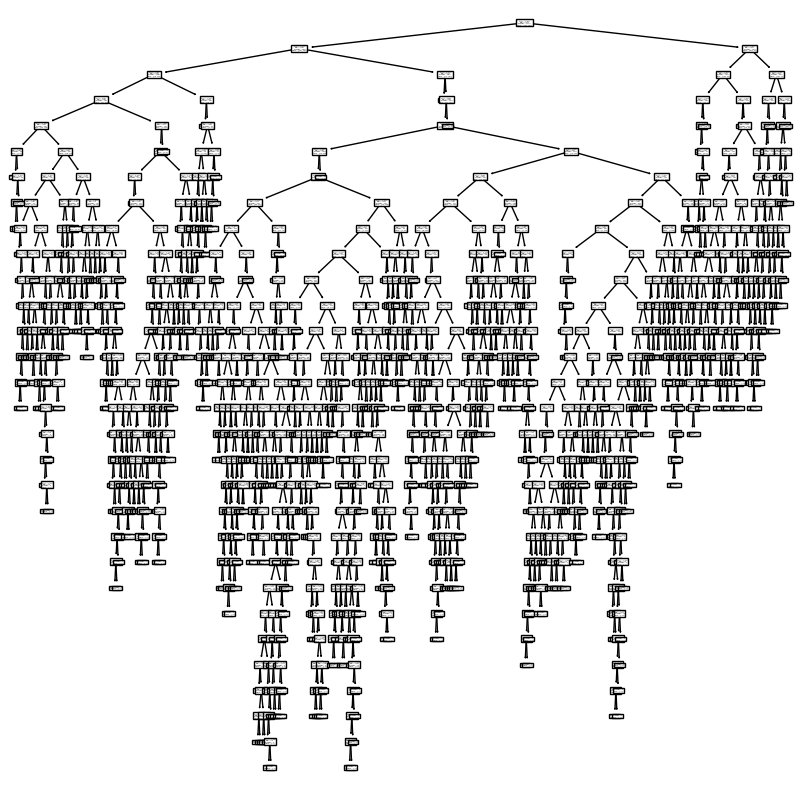

In [ ]:
plt.subplots(1,1,figsize=(10,10))
_= tree.plot_tree(modelo_c5)

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas derivadas de la matriz de confusión.

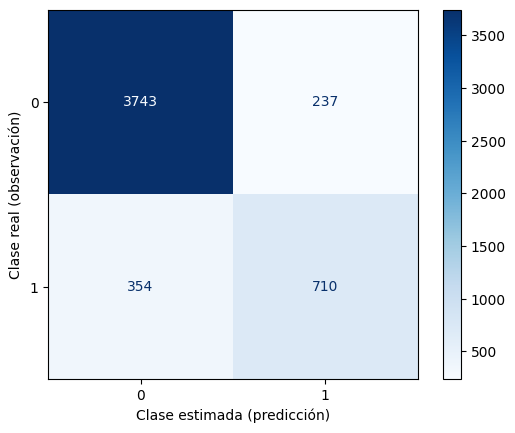

In [ ]:
#Matriz de Confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_c5.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

Verdaderos positivos (VP): 710
Falsos positivos (FP): 237
Verdaderos negativos (VN): 3743
Falsos negativos (FN): 354


In [ ]:
#Tasa de error
Tasa_FP_5 = FP/(FP+VN)
Tasa_FN_5 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_5 )
print("Error tipo II: %.2f" % Tasa_FN_5 )

Error tipo I: 0.06
Error tipo II: 0.33


In [ ]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      3980
           1       0.75      0.67      0.71      1064

    accuracy                           0.88      5044
   macro avg       0.83      0.80      0.82      5044
weighted avg       0.88      0.88      0.88      5044



In [ ]:
#Accuracy
SCORE_5 = accuracy_score(Ytest,Y_hat)
print("ACCURACY: %.2f" % SCORE_5 )

#F1-Score
f1_5 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_5 )

ACCURACY: 0.88
F1-Score: 0.71


   🟠  ¡Ahora es tu turno de interpretar los resultados!  🟠

####**Modelo 6**

✅ Paso 1 - Definición de Variables: Utilizamos las variables $X$ e $Y$ previamente definidas, normalizadas y divididas en conjunto de entrenamiento y test.

➡️`Tuning`: Mejoramos el modelo haciendo una sintonizacion (tuning), donde se modifican los hiperparámetros del modelo con el fin de mejorarlo. Los hiperparámetros son configuraciones que se establecen antes de entrenar el modelo y afectan el proceso de aprendizaje, pero no son aprendidos directamente del conjunto de datos durante el entrenamiento, por lo que deben ser introducidas manualmente.

✅ Paso 2 - Modelo: Creación del modelo de Árbol de Clasificación.

In [ ]:
modelo_c6 = DecisionTreeClassifier(max_depth=10, min_samples_split =3, min_samples_leaf=2, class_weight='balanced', random_state=123)

✅ Paso 3 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain normalizada y Ytrain.

In [ ]:
modelo_c6.fit(Xtrain_sc, Ytrain)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=3,
                       random_state=123)

✅ Paso 4 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest normalizada. Como resultado obtenemos $\hat Y$ (Y_hat).

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_c6.predict(Xtest_sc)

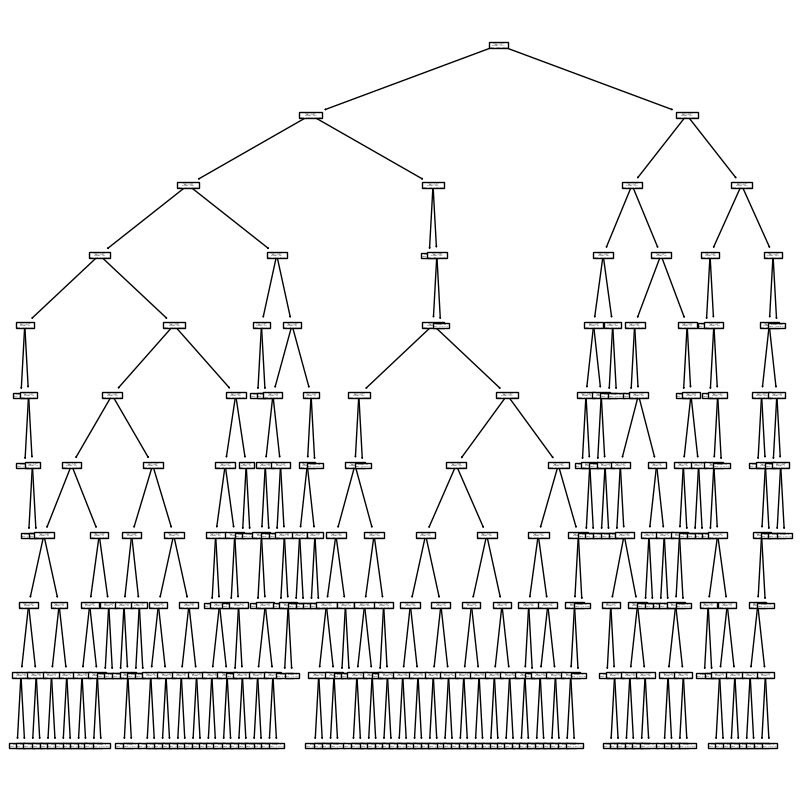

In [ ]:
#Grafico
plt.subplots(1,1,figsize=(10,10))
_= tree.plot_tree(modelo_c6)

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas derivadas de la matriz de confusión.

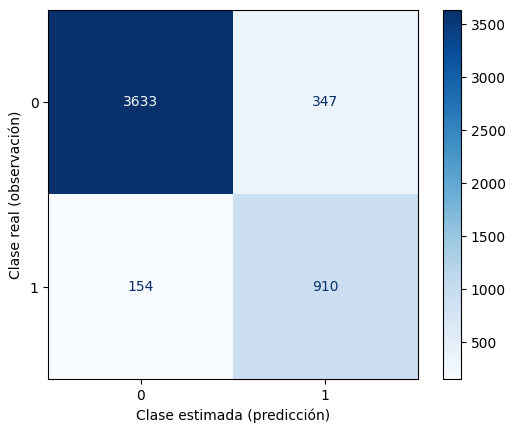

In [ ]:
#Matriz de Confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_c6.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

Verdaderos positivos (VP): 910
Falsos positivos (FP): 347
Verdaderos negativos (VN): 3633
Falsos negativos (FN): 154


In [ ]:
#Tasa de error
Tasa_FP_6 = FP/(FP+VN)
Tasa_FN_6 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_6 )
print("Error tipo II: %.2f" % Tasa_FN_6 )

Error tipo I: 0.09
Error tipo II: 0.14


In [ ]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      3980
           1       0.72      0.86      0.78      1064

    accuracy                           0.90      5044
   macro avg       0.84      0.88      0.86      5044
weighted avg       0.91      0.90      0.90      5044



In [ ]:
#Accuracy
SCORE_6 = modelo_c6.score(Xtest_sc,Ytest)
print("ACCURACY: %.2f" % SCORE_6)

#F1-Score
f1_6 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_6)

ACCURACY: 0.90
F1-Score: 0.78


   🟠  ¡Ahora es tu turno de interpretar los resultados!  🟠

####**Modelo 7**

✅ Paso 1 - Definición de Variables: Utilizamos las variables $X$ e $Y$ previamente definidas, normalizadas y divididas en conjunto de entrenamiento y test.

✅ Paso 2 - Modelo: Creación del modelo de Árbol de Clasificación.

Probar manualmente ajustando todos los hiperparámetros hasta encontrar los valores óptimos puede tomar mucho tiempo, por lo que es mejor utilizar un algoritmo que ayude a encontrar la mejor combinación de éstos.

➡️ `GridSearchCV`: Método para realizar una búsqueda de los hiperparámetros del modelo. Es una técnica de validación cruzada que se ejecuta a través de los diferentes hiperparámetros que se introducen en la cuadrícula de hiperparámetros (matriz o grilla) y extrae los mejores valores y combinaciones de éstos.

In [ ]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None,5,6,7,8,9,10,11,12,13,14,15],
    'min_samples_split': [2,3,4,5],
    'min_samples_leaf': [1,2,3,4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Crear el modelo base con class_weight='balanced'
modelo = DecisionTreeClassifier(class_weight='balanced', random_state=123)

# Inicializar Grid Search con validación cruzada (CV) estratificada
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, scoring='accuracy')

# Ajustar Grid Search a los datos de entrenamiento
grid_search.fit(Xtrain_sc, Ytrain)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:")
best_params

Mejores hiperparámetros encontrados:


{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'splitter': 'best'}

In [ ]:
#modelo_c7 = DecisionTreeClassifier(**best_params, class_weight='balanced', random_state=123)
modelo_c7 = DecisionTreeClassifier(criterion='gini', max_depth=15, max_features='auto',
                                   min_samples_leaf=1, min_samples_split=4, splitter='best',
                                   class_weight='balanced', random_state=123)

✅ Paso 3 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain normalizada y Ytrain.

In [ ]:
modelo_c7.fit(Xtrain_sc, Ytrain)

DecisionTreeClassifier(class_weight='balanced', max_depth=15,
                       max_features='auto', min_samples_split=4,
                       random_state=123)

✅ Paso 4 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest normalizada. Como resultado obtenemos $\hat Y$ (Y_hat).

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_c7.predict(Xtest_sc)

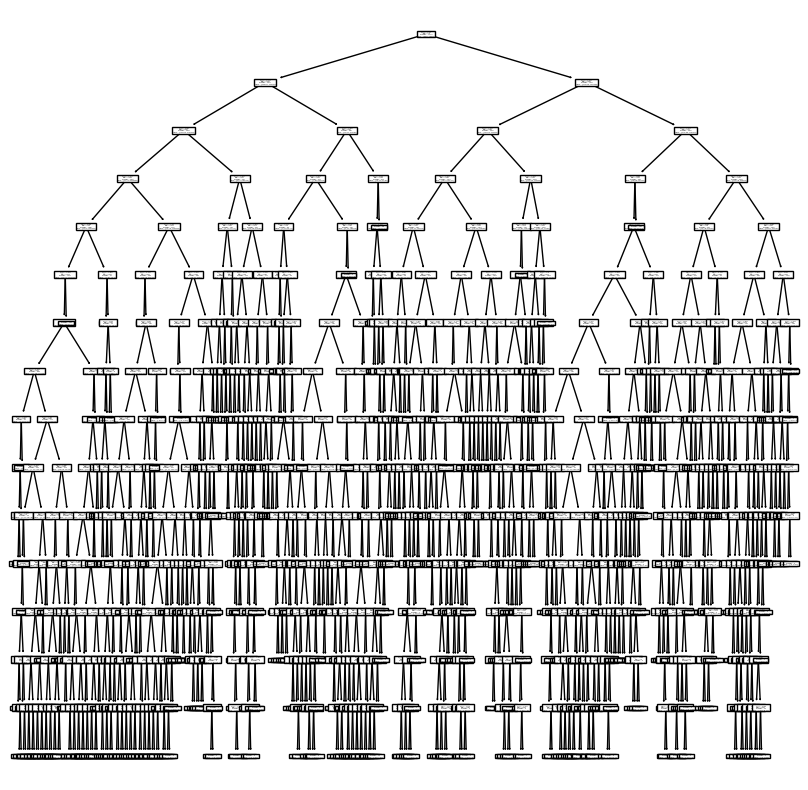

In [ ]:
#Grafico
plt.subplots(1,1,figsize=(10,10))
_= tree.plot_tree(modelo_c7)

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas derivadas de la matriz de confusión.

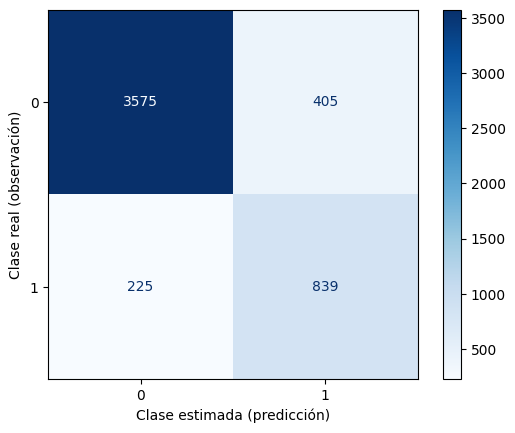

In [ ]:
#Matriz de Confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_c7.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

Verdaderos positivos (VP): 839
Falsos positivos (FP): 405
Verdaderos negativos (VN): 3575
Falsos negativos (FN): 225


In [ ]:
#Tasa de error
Tasa_FP_7 = FP/(FP+VN)
Tasa_FN_7 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_7 )
print("Error tipo II: %.2f" % Tasa_FN_7 )

Error tipo I: 0.10
Error tipo II: 0.21


In [ ]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3980
           1       0.67      0.79      0.73      1064

    accuracy                           0.88      5044
   macro avg       0.81      0.84      0.82      5044
weighted avg       0.88      0.88      0.88      5044



In [ ]:
#Accuracy
SCORE_7 = modelo_c7.score(Xtest_sc,Ytest)
print("ACCURACY: %.2f" % SCORE_7)

#F1-Score
f1_7 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_7)

ACCURACY: 0.88
F1-Score: 0.73


   🟠  ¡Ahora es tu turno de interpretar los resultados!  🟠

####**Modelo 8**

✅ Paso 1 - Definición de Variables: Utilizamos las variables $X$ e $Y$ previamente definidas, normalizadas y divididas en conjunto de entrenamiento y test.

✅ Paso 2 - Modelo: Creación del modelo de Árbol de Clasificación.

➡️ `BayesSearchCV()`: Se utiliza para realizar una búsqueda bayesiana de hiperparámetros en modelos de aprendizaje automático. BayesSearchCV es una extensión de `GridSearchCV` y `RandomizedSearchCV`, pero utiliza un enfoque de optimización bayesiana más avanzado para explorar el espacio de hiperparámetros de manera eficiente.

In [ ]:
pip install scikit-optimize

In [ ]:
from skopt import BayesSearchCV

In [ ]:
# Define el espacio de búsqueda de hiperparámetros
param_space = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None,5,6,7,8,9,10,11,12,13,14,15],
    'min_samples_split': [2,3,4,5],
    'min_samples_leaf': [1,2,3,4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Crear el modelo base con class_weight='balanced'
modelo = DecisionTreeClassifier(class_weight='balanced', random_state=123)

# Realiza la búsqueda bayesiana de hiperparámetros
bayes = BayesSearchCV(
    modelo,
    param_space,
    n_iter=30,  # Número de iteraciones de la búsqueda bayesiana
    cv=5,  # Número de divisiones para la validación cruzada
    n_jobs=-1,  # Utiliza todos los núcleos del procesador
    verbose=0  # Nivel de verbosidad
)

# Ajusta el modelo con los mejores hiperparámetros encontrados
bayes.fit(Xtrain_sc, Ytrain)

# Muestra los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
print(bayes.best_params_)


Mejores hiperparámetros:
OrderedDict([('criterion', 'gini'), ('max_depth', 12), ('max_features', 'sqrt'), ('min_samples_leaf', 1), ('min_samples_split', 4), ('splitter', 'best')])


In [ ]:
#modelo_c8 = DecisionTreeClassifier(**best_params, class_weight='balanced', random_state=123)
modelo_c8 = DecisionTreeClassifier(criterion='gini', max_depth=12, max_features='sqrt',
                                   min_samples_leaf=1, min_samples_split=4, splitter='best',
                                   class_weight='balanced', random_state=123)

✅ Paso 3 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain normalizada y Ytrain.

In [ ]:
modelo_c8.fit(Xtrain_sc, Ytrain)

DecisionTreeClassifier(class_weight='balanced', max_depth=12,
                       max_features='sqrt', min_samples_split=4,
                       random_state=123)

✅ Paso 4 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest normalizada. Como resultado obtenemos $\hat Y$ (Y_hat).

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_c8.predict(Xtest_sc)

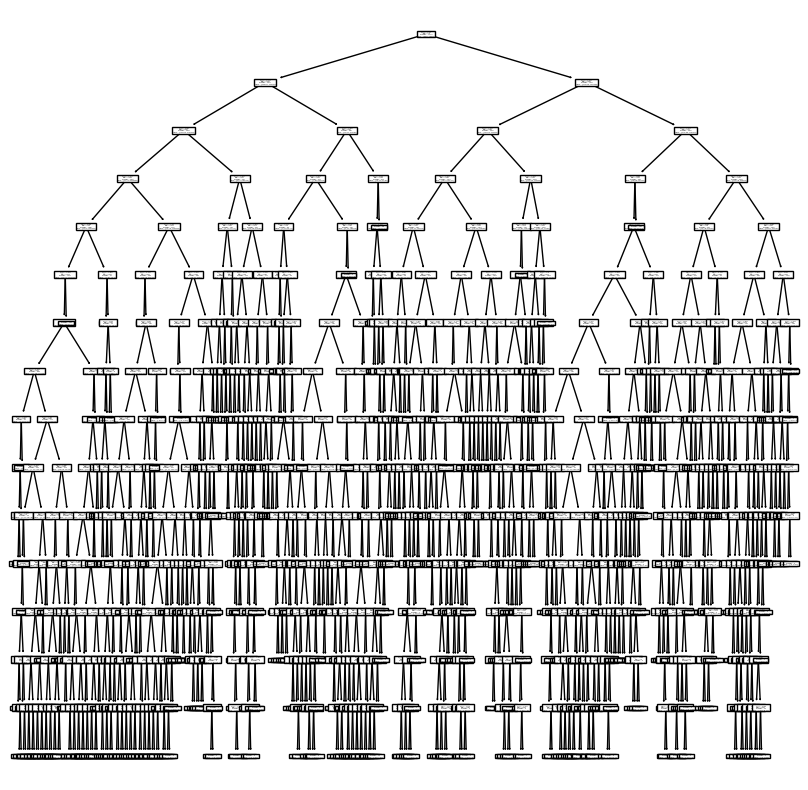

In [ ]:
#Grafico
plt.subplots(1,1,figsize=(10,10))
_= tree.plot_tree(modelo_c8)

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas derivadas de la matriz de confusión.

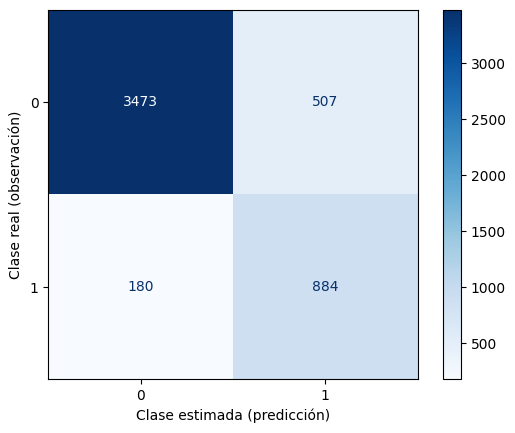

In [ ]:
#Matriz de Confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_c8.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

Verdaderos positivos (VP): 884
Falsos positivos (FP): 507
Verdaderos negativos (VN): 3473
Falsos negativos (FN): 180


In [ ]:
#Tasa de error
Tasa_FP_8 = FP/(FP+VN)
Tasa_FN_8 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_8 )
print("Error tipo II: %.2f" % Tasa_FN_8 )

Error tipo I: 0.13
Error tipo II: 0.17


In [ ]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      3980
           1       0.64      0.83      0.72      1064

    accuracy                           0.86      5044
   macro avg       0.79      0.85      0.82      5044
weighted avg       0.88      0.86      0.87      5044



In [ ]:
#Accuracy
SCORE_8 = modelo_c8.score(Xtest_sc,Ytest)
print("ACCURACY: %.2f" % SCORE_8)

#F1-Score
f1_8 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_8)

ACCURACY: 0.86
F1-Score: 0.72


   🟠  ¡Ahora es tu turno de interpretar los resultados!  🟠

### **3. K-Nearest Neighbors (KNN)**

➡️ `KNeighborsClassifier()`: Se utiliza para clasificar puntos de datos en función de la mayoría de las clases a las que pertenecen sus vecinos más cercanos en el espacio de características.

Parámetros (sci-kit learn):

> ●   `n_neighbors`:  Define el número de vecinos cercanos (k) que se utilizarán para hacer predicciones. Valores más pequeños de "k" pueden llevar a un modelo más sensible al ruido, mientras que valores más grandes pueden suavizar la decisión, pero podrían perder detalles. (predeterminado = 5)

> ●   `metric`: Especifica la métrica de distancia utilizada para medir la similitud entre los puntos de datos. Algunas opciones comunes incluyen 'euclidean', 'manhattan', 'chebyshev', 'minkowski', y 'hamming', entre otras. (predeterminado = 'minkowski')

> ●   `p`: Controla la potencia en la métrica de Minkowski. Cuando p = 2, se utiliza la distancia euclidiana; cuando p = 1, se utiliza la distancia de Manhattan. Valores más bajos de p dan más peso a las diferencias individuales en las características, mientras que valores más altos de p dan menos peso a las diferencias individuales y tienden a considerarlas más uniformemente.(predeterminado = 2)

> ●   `weights`: Controla cómo se ponderan las contribuciones de los vecinos al hacer una predicción. Puede tomar dos valores principales: 'uniform' donde todos los vecinos tienen el mismo peso en la predicción y 'distance' donde los vecinos más cercanos tienen un mayor peso en la predicción que los vecinos más lejanos, y el peso se calcula en función de la inversa de la distancia. (predeterminado = 'uniform')

> ●   `algorithm`: Controla el algoritmo utilizado para calcular los vecinos más cercanos. Los valores posibles incluyen 'auto', 'ball_tree', 'kd_tree' y 'brute'. El valor predeterminado es 'auto', que selecciona el algoritmo más adecuado automáticamente según el tamaño y la naturaleza del conjunto de datos.(predeterminado = 'auto')

####**Modelo 9**

✅ Paso 1 - Definición de variables: Utilizamos las variables $X$ e $Y$ previamente definidas y divididas en conjunto de entrenamiento y prueba.

✅ Paso 2 - Modelo: Creación del modelo KNN.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
modelo_c9 = KNeighborsClassifier(n_neighbors=3)

✅ Paso 3 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain y Ytrain.

In [ ]:
modelo_c9.fit(Xtrain_sc, Ytrain)

KNeighborsClassifier(n_neighbors=3)

✅ Paso 4 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest. Como resultado obtenemos $\hat Y$ (Y_hat).

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_c9.predict(Xtest_sc)

Con este modelo se predece el precio de una casa basado en las características de casas similares cercanas.

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas derivadas de la matriz de confusión.

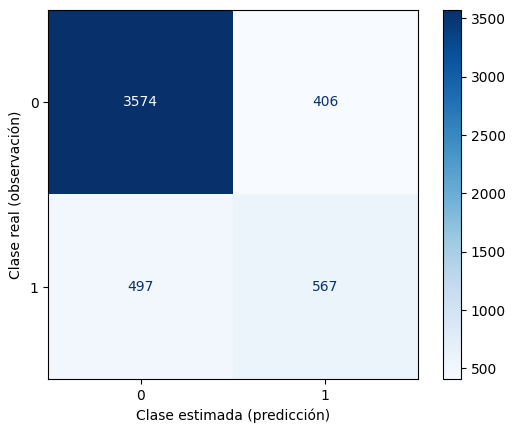

In [ ]:
#Matriz de Confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_c9.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

Verdaderos positivos (VP): 567
Falsos positivos (FP): 406
Verdaderos negativos (VN): 3574
Falsos negativos (FN): 497


In [ ]:
#Tasa de error
Tasa_FP_9 = FP/(FP+VN)
Tasa_FN_9 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_9 )
print("Error tipo II: %.2f" % Tasa_FN_9 )

Error tipo I: 0.10
Error tipo II: 0.47


In [ ]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3980
           1       0.58      0.53      0.56      1064

    accuracy                           0.82      5044
   macro avg       0.73      0.72      0.72      5044
weighted avg       0.82      0.82      0.82      5044



In [ ]:
#Accuracy
SCORE_9 = modelo_c9.score(Xtest_sc,Ytest)
print("ACCURACY: %.2f" % SCORE_9)

#F1-Score
f1_9 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_9)

ACCURACY: 0.82
F1-Score: 0.56


   🟠  ¡Ahora es tu turno de interpretar los resultados!  🟠

####**Modelo 10**

✅ Paso 1 - Definición de variables: Utilizamos las variables $X$ e $Y$ previamente definidas y divididas en conjunto de entrenamiento y prueba.

✅ Paso 2 - Modelo: Creación del modelo KNN.

In [ ]:
modelo_c10 = KNeighborsClassifier(n_neighbors=10, p=1, weights='distance')

✅ Paso 3 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain y Ytrain.

In [ ]:
modelo_c10.fit(Xtrain_sc, Ytrain)

KNeighborsClassifier(n_neighbors=10, p=1, weights='distance')

✅ Paso 4 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest. Como resultado obtenemos $\hat Y$ (Y_hat).

Se pone a prueba el modelo realizando una predicción con datos fuera de la muestra (out-of-sample).

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_c10.predict(Xtest_sc)

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas.

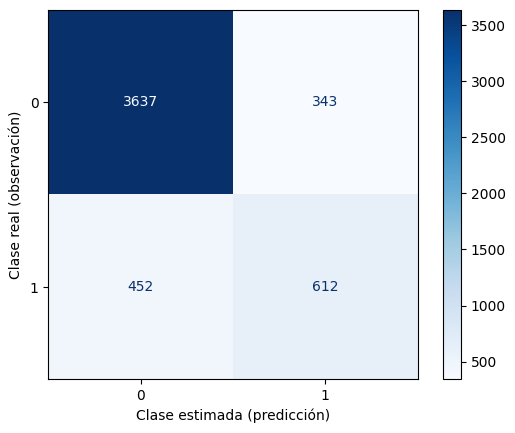

In [ ]:
#Matriz de Confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_c10.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

Verdaderos positivos (VP): 612
Falsos positivos (FP): 343
Verdaderos negativos (VN): 3637
Falsos negativos (FN): 452


In [ ]:
#Tasa de error
Tasa_FP_10 = FP/(FP+VN)
Tasa_FN_10 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_10)
print("Error tipo II: %.2f" % Tasa_FN_10)

Error tipo I: 0.09
Error tipo II: 0.42


In [ ]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      3980
           1       0.64      0.58      0.61      1064

    accuracy                           0.84      5044
   macro avg       0.77      0.74      0.75      5044
weighted avg       0.84      0.84      0.84      5044



In [ ]:
#Accuracy
SCORE_10 = modelo_c10.score(Xtest_sc,Ytest)
print("ACCURACY: %.2f" % SCORE_10)

#F1-Score
f1_10 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_10)

ACCURACY: 0.84
F1-Score: 0.61


   🟠  ¡Ahora es tu turno de interpretar los resultados!  🟠

####**Modelo 11**

✅ Paso 1 - Definición de variables: Utilizamos las variables $X$ e $Y$ previamente definidas y divididas en conjunto de entrenamiento y prueba.

✅ Paso 2 - Modelo: Creación del modelo KNN.

In [ ]:
modelo_c11 = KNeighborsClassifier(n_neighbors=10, p=3, weights='distance', algorithm='brute')

'''
'brute' calcula la distancia entre todos los puntos en el conjunto de entrenamiento,
lo que puede ser extremadamente lento en conjuntos de datos grandes o de alta dimensionalidad.
El rendimiento se vuelve ineficiente a medida que el tamaño del conjunto de entrenamiento crece.
'''

"\n'brute' calcula la distancia entre todos los puntos en el conjunto de entrenamiento,\nlo que puede ser extremadamente lento en conjuntos de datos grandes o de alta dimensionalidad.\nEl rendimiento se vuelve ineficiente a medida que el tamaño del conjunto de entrenamiento crece.\n"

✅ Paso 3 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain y Ytrain.

In [ ]:
modelo_c11.fit(Xtrain_sc, Ytrain)

KNeighborsClassifier(algorithm='brute', n_neighbors=10, p=3, weights='distance')

✅ Paso 4 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest. Como resultado obtenemos $\hat Y$ (Y_hat).

Se pone a prueba el modelo realizando una predicción con datos fuera de la muestra (out-of-sample).

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_c11.predict(Xtest_sc)

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas.

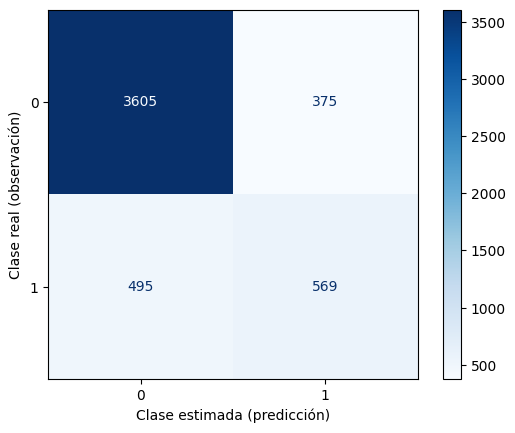

In [ ]:
#Matriz de Confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_c11.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

Verdaderos positivos (VP): 569
Falsos positivos (FP): 375
Verdaderos negativos (VN): 3605
Falsos negativos (FN): 495


In [ ]:
#Tasa de error
Tasa_FP_11 = FP/(FP+VN)
Tasa_FN_11 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_11)
print("Error tipo II: %.2f" % Tasa_FN_11)

Error tipo I: 0.09
Error tipo II: 0.47


In [ ]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      3980
           1       0.60      0.53      0.57      1064

    accuracy                           0.83      5044
   macro avg       0.74      0.72      0.73      5044
weighted avg       0.82      0.83      0.82      5044



In [ ]:
#Accuracy
SCORE_11 = modelo_c11.score(Xtest_sc,Ytest)
print("ACCURACY: %.2f" % SCORE_11)

#F1-Score
f1_11 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_11)

ACCURACY: 0.83
F1-Score: 0.57


   🟠  ¡Ahora es tu turno de interpretar los resultados!  🟠

####**Modelo 12**

✅ Paso 1 - Definición de variables: Utilizamos las variables $X$ e $Y$ previamente definidas y divididas en conjunto de entrenamiento y prueba.

✅ Paso 2 - Modelo: Creación del modelo KNN.

In [ ]:
# Definir la lista de hiperparámetros a probar
param_grid = {
    'n_neighbors': [2,3,5,7,9,12],  # Valores de K
    'p': [1,2,3,4,5],
    'algorithm':['auto', 'ball_tree', 'kd_tree','brute']
}

# Crear el modelo KNN
modelo = KNeighborsClassifier(weights='distance')

# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, scoring='f1', cv=5)
grid_search.fit(Xtrain_sc, Ytrain)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
best_params

{'algorithm': 'ball_tree', 'n_neighbors': 12, 'p': 1}

In [ ]:
#modelo_c12 = KNeighborsClassifier(**best_params, weights='distance')
modelo_c12 = KNeighborsClassifier(algorithm='ball_tree',n_neighbors=12,
                                  p=1, weights='distance')

✅ Paso 3 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain y Ytrain.

In [ ]:
modelo_c12.fit(Xtrain_sc, Ytrain)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=12, p=1,
                     weights='distance')

✅ Paso 4 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest. Como resultado obtenemos $\hat Y$ (Y_hat).

Se pone a prueba el modelo realizando una predicción con datos fuera de la muestra (out-of-sample).

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_c12.predict(Xtest_sc)

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas.

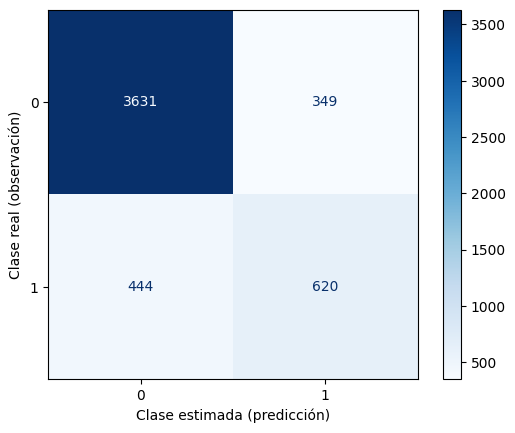

In [ ]:
#Matriz de Confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_c12.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

Verdaderos positivos (VP): 620
Falsos positivos (FP): 349
Verdaderos negativos (VN): 3631
Falsos negativos (FN): 444


In [ ]:
#Tasa de error
Tasa_FP_12 = FP/(FP+VN)
Tasa_FN_12 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_12)
print("Error tipo II: %.2f" % Tasa_FN_12)

Error tipo I: 0.09
Error tipo II: 0.42


In [ ]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      3980
           1       0.64      0.58      0.61      1064

    accuracy                           0.84      5044
   macro avg       0.77      0.75      0.76      5044
weighted avg       0.84      0.84      0.84      5044



In [ ]:
#Accuracy
SCORE_12 = modelo_c12.score(Xtest_sc,Ytest)
print("ACCURACY: %.2f" % SCORE_12)

#F1-Score
f1_12 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_12)

ACCURACY: 0.84
F1-Score: 0.61


   🟠  ¡Ahora es tu turno de interpretar los resultados!  🟠

###**4. Random Forest**

➡️ `RandomForestClassifier()`:  Se basa en el concepto de "ensamblaje de árboles" y pertenece a la categoría de métodos de ensamblaje, lo que significa que combina múltiples modelos de árbol de decisión para mejorar la precisión y la robustez del modelo.

Parámetros:

> ●   `n_estimators`:  Controla el número de árboles en el bosque. Un valor mayor generalmente mejora la calidad del modelo, pero también puede aumentar el costo computacional. Debes ajustarlo según tus necesidades, pero valores típicos suelen oscilar entre 50 y 500. (predeterminado=100)

> ●   `criterion`:  Define la función utilizada para medir la calidad de una división en un árbol. Puede ser 'gini' para el índice de Gini o 'entropy' para la ganancia de información. Ambas métricas miden la pureza de las divisiones. (predeterminado='gini')

> ●   `max_depth`:  Controla la profundidad máxima de cada árbol en el bosque. Limitar la profundidad puede ayudar a prevenir el sobreajuste (overfitting). Si no se establece un valor, los árboles se expandirán hasta que todas las hojas contengan un número mínimo de muestras (controlado por min_samples_split o min_samples_leaf), es decir que no hay una restriccion en la profundidad de cada árbol (None). Ajustar max_depth es útil para controlar la complejidad del modelo. (predeterminado=None)

> ●   `min_samples_split`:  Define el número mínimo de muestras requeridas para dividir un nodo interno de cada árbol. Si un nodo tiene menos de este número de muestras, no se dividirá más. Ajustar este valor puede ayudar a controlar el sobreajuste. (predeterminado=2)

> ●   `min_samples_leaf`:  Establece el número mínimo de muestras requeridas en una hoja (nodo terminal) de cada árbol. Similar a min_samples_split, este parámetro controla el sobreajuste regulando la cantidad de datos necesarios en cada hoja. (predeterminado=1)

> ●   `max_features`:  Controla la cantidad de características que se consideran al buscar la mejor división en cada nodo de cada árbol. Se puede establecer como un número entero (el número exacto de características a considerar) o como una fracción (por ejemplo, "sqrt" para la raíz cuadrada del número total de características). La elección de características aleatorias en cada división ayuda a reducir la correlación entre los árboles y mejora la generalización. (predeterminado='auto')

> ●   `class_weight`: Puede ser utilizado para asignar pesos a las clases en el modelo, útil cuando las clases están desequilibradas, en ese caso se usa 'balanced'. (predeterminado=None)

> ●   `bootstrap`: Indica si se deben tomar muestras con reemplazo al construir árboles individuales en el bosque. Si es True, se utiliza el muestreo con reemplazo (bootstrap). Si es False, se utiliza el muestreo sin reemplazo. (predeterminado=True)

> ●   `random_state`:  Permite establecer una semilla para la generación de números aleatorios, lo que garantiza reproducibilidad en los resultados.

####**Modelo 13**

✅ Paso 1 - Definición de variables: Utilizamos las variables $X$ e $Y$ previamente definidas y divididas en conjunto de entrenamiento y prueba.

✅ Paso 2 - Modelo: Creación del modelo Random Forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelo_c13 = RandomForestClassifier(n_estimators=50, max_depth=10)

✅ Paso 3 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain y Ytrain.

In [ ]:
modelo_c13.fit(Xtrain_sc, Ytrain)

RandomForestClassifier(max_depth=10, n_estimators=50)

✅ Paso 4 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest. Como resultado obtenemos $\hat Y$ (Y_hat).

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_c13.predict(Xtest_sc)

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas.

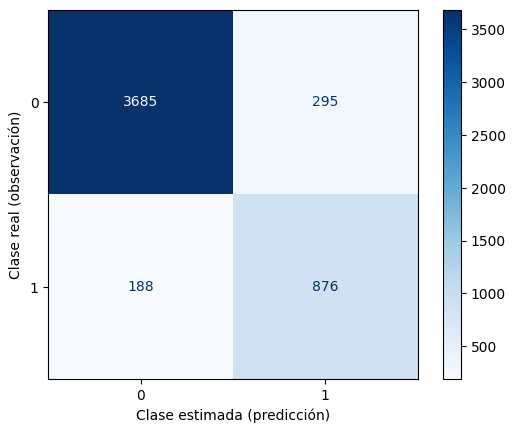

In [ ]:
#Matriz de Confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_c13.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

Verdaderos positivos (VP): 876
Falsos positivos (FP): 295
Verdaderos negativos (VN): 3685
Falsos negativos (FN): 188


In [ ]:
#Tasa de error
Tasa_FP_13 = FP/(FP+VN)
Tasa_FN_13 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_13)
print("Error tipo II: %.2f" % Tasa_FN_13)

Error tipo I: 0.07
Error tipo II: 0.18


In [ ]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3980
           1       0.75      0.82      0.78      1064

    accuracy                           0.90      5044
   macro avg       0.85      0.87      0.86      5044
weighted avg       0.91      0.90      0.91      5044



In [ ]:
#Accuracy
SCORE_13 = modelo_c13.score(Xtest_sc,Ytest)
print("ACCURACY: %.2f" % SCORE_13)

#F1-Score
f1_13 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_13)

ACCURACY: 0.90
F1-Score: 0.78


   🟠  ¡Ahora es tu turno de interpretar los resultados!  🟠

####**Modelo 14**

✅ Paso 1 - Definición de variables: Utilizamos las variables $X$ e $Y$ previamente definidas y divididas en conjunto de entrenamiento y prueba.

✅ Paso 2 - Modelo: Creación del modelo Random Forest.

In [ ]:
modelo_c14 = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=2,min_samples_leaf=2,class_weight='balanced')

✅ Paso 3 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain y Ytrain.

In [ ]:
modelo_c14.fit(Xtrain_sc, Ytrain)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, n_estimators=50)

✅ Paso 4 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest. Como resultado obtenemos $\hat Y$ (Y_hat).

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_c14.predict(Xtest_sc)

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas.

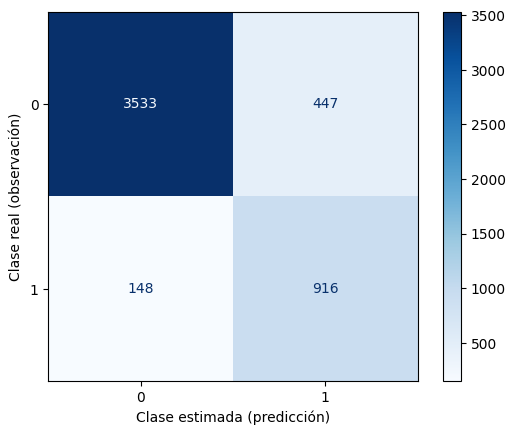

In [ ]:
#Matriz de Confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_c14.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

Verdaderos positivos (VP): 916
Falsos positivos (FP): 447
Verdaderos negativos (VN): 3533
Falsos negativos (FN): 148


In [ ]:
#Tasa de error
Tasa_FP_14 = FP/(FP+VN)
Tasa_FN_14 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_14)
print("Error tipo II: %.2f" % Tasa_FN_14)

Error tipo I: 0.11
Error tipo II: 0.14


In [ ]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      3980
           1       0.67      0.86      0.75      1064

    accuracy                           0.88      5044
   macro avg       0.82      0.87      0.84      5044
weighted avg       0.90      0.88      0.89      5044



In [ ]:
#Accuracy
SCORE_14 = modelo_c14.score(Xtest_sc,Ytest)
print("ACCURACY: %.2f" % SCORE_14)

#F1-Score
f1_14 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_14)

ACCURACY: 0.88
F1-Score: 0.75


   🟠  ¡Ahora es tu turno de interpretar los resultados!  🟠

####**Modelo 15**

✅ Paso 1 - Definición de variables: Utilizamos las variables $X$ e $Y$ previamente definidas y divididas en conjunto de entrenamiento y prueba.

✅ Paso 2 - Modelo: Creación del modelo Random Forest.

In [ ]:
# Ajuste de hiperparámetros utilizando GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 3, 5,7],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Crear una instancia del modelo Random Forest
modelo = RandomForestClassifier(class_weight='balanced', random_state=123)

# Utilizar GridSearchCV para encontrar la mejor combinación de hiperparámetros
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(Xtrain, Ytrain)

# Obtener la mejor combinación de hiperparámetros
mejores_parametros = grid_search.best_params_
mejores_parametros

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'n_estimators': 100}

In [ ]:
# Crear un modelo Random Forest con los mejores parámetros
modelo_c15 = RandomForestClassifier(**mejores_parametros, class_weight='balanced')

✅ Paso 3 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain y Ytrain.

In [ ]:
modelo_c15.fit(Xtrain_sc, Ytrain)

RandomForestClassifier(class_weight='balanced', max_features='auto',
                       min_samples_leaf=2, min_samples_split=7)

✅ Paso 4 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest. Como resultado obtenemos $\hat Y$ (Y_hat).

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_c15.predict(Xtest_sc)

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas.

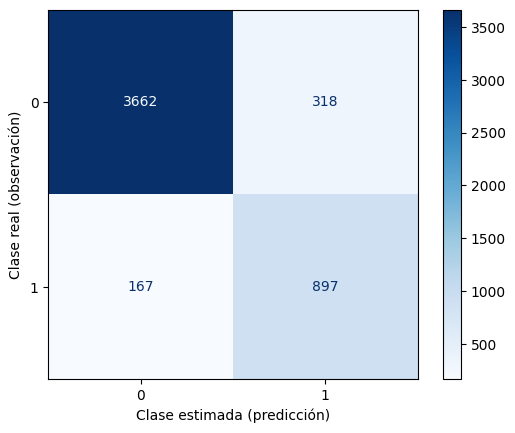

In [ ]:
#Matriz de Confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_c15.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

Verdaderos positivos (VP): 897
Falsos positivos (FP): 318
Verdaderos negativos (VN): 3662
Falsos negativos (FN): 167


In [ ]:
#Tasa de error
Tasa_FP_15 = FP/(FP+VN)
Tasa_FN_15 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_15)
print("Error tipo II: %.2f" % Tasa_FN_15)

Error tipo I: 0.08
Error tipo II: 0.16


In [ ]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      3980
           1       0.74      0.84      0.79      1064

    accuracy                           0.90      5044
   macro avg       0.85      0.88      0.86      5044
weighted avg       0.91      0.90      0.91      5044



In [ ]:
#Accuracy
SCORE_15 = modelo_c15.score(Xtest_sc,Ytest)
print("ACCURACY: %.2f" % SCORE_15)

#F1-Score
f1_15 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_15)

ACCURACY: 0.90


   🟠  ¡Ahora es tu turno de interpretar los resultados!  🟠

### **5. Support Vector Machines (SVM)**

➡️ `SVC()`: Máquinas de Soporte Vectorial de Clasificación se utiliza para clasificar puntos de datos en dos o más clases, encontrando el hiperplano que mejor separa las clases en el espacio de características.

Parámetros:

> ●   `kernel`:  especifica el tipo de kernel a utilizar en el modelo SVR. Algunas opciones comunes son 'linear' (kernel lineal), 'poly' (kernel polinómico), 'rbf' (kernel radial), entre otros. Un kernel es una función matemática que se utiliza para transformar los datos de entrada desde un espacio de características original a un espacio de características de mayor dimensión. (predeterminado='rbf')

> ●   `degree`:  Solo se utiliza cuando kernel='poly'. Controla el grado del polinomio para el núcleo polinómico. (predeterminado=3)

> ●   `C`: Controla el término de regularización en SVR. Determina el equilibrio entre la maximización del margen y la minimización del error de regresión. Valores más grandes de C permiten un margen más pequeño pero pueden reducir el error de entrenamiento, lo que podría llevar a un sobreajuste. (predeterminado=1.0)

> ●   `gamma`: Este parámetro es relevante solo para algunos kernels, como el kernel 'rbf' (radial basis function) y el kernel 'poly' (polinómico). Controla la influencia de los puntos de datos en la función de decisión. Valores más pequeños de gamma dan como resultado una función de decisión más suave, mientras que valores más grandes hacen que la función sea más sensible a los puntos de datos cercanos. (predeterminado= 'scale' (valor que depende de la escala de las características) para 'rbf' y 'auto' (1/n_features) para 'poly' y 'sigmoid'.)

> ●   `coef0`: Solo se utiliza en los núcleos 'poly' y 'sigmoid'. Controla la constante independiente en estas funciones de kernel. (predeterminado=0)

> ●   `class_weight`: Permite asignar pesos a las clases para manejar conjuntos de datos desbalanceados. Se establece en 'balanced' para asignar automáticamente pesos inversamente proporcionales a las frecuencias de clase en los datos de entrenamiento. (predeterminado=None)

####**Modelo 16**



✅ Paso 1 - Definición de variables: Utilizamos las variables $X$ e $Y$ previamente definidas y divididas en conjunto de entrenamiento y prueba.

✅ Paso 2 - Modelo: Creación del modelo SVM.


In [ ]:
from sklearn.svm import SVC

In [ ]:
modelo_c16 = SVC(C=1, class_weight='balanced')

✅ Paso 3 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain y Ytrain.

In [ ]:
modelo_c16.fit(Xtrain, Ytrain)

SVC(C=1, class_weight='balanced')

✅ Paso 4 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest. Como resultado obtenemos $\hat Y$ (Y_hat).

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_c16.predict(Xtest)

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas.

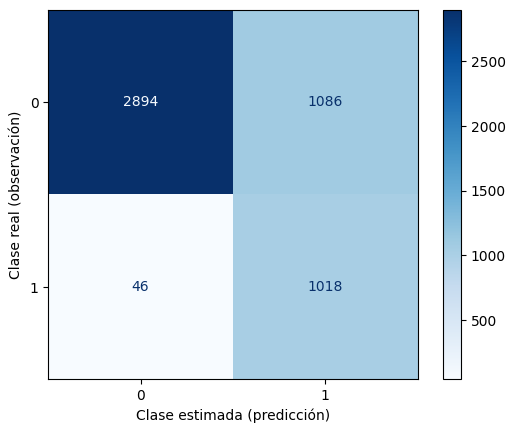

In [ ]:
#Matriz de Confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_c16.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

Verdaderos positivos (VP): 1018
Falsos positivos (FP): 1086
Verdaderos negativos (VN): 2894
Falsos negativos (FN): 46


In [ ]:
#Tasa de error
Tasa_FP_16 = FP/(FP+VN)
Tasa_FN_16 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_16)
print("Error tipo II: %.2f" % Tasa_FN_16)

Error tipo I: 0.27
Error tipo II: 0.04


In [ ]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       0.98      0.73      0.84      3980
           1       0.48      0.96      0.64      1064

    accuracy                           0.78      5044
   macro avg       0.73      0.84      0.74      5044
weighted avg       0.88      0.78      0.80      5044



In [ ]:
#Accuracy
SCORE_16 = modelo_c16.score(Xtest_sc,Ytest)
print("ACCURACY: %.2f" % SCORE_16)

#F1-Score
f1_16 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_16)

ACCURACY: 0.79
F1-Score: 0.64


   🟠  ¡Ahora es tu turno de interpretar los resultados!  🟠

####**Modelo 17**

✅ Paso 1 - Definición de variables: Utilizamos las variables $X$ e $Y$ previamente definidas y divididas en conjunto de entrenamiento y prueba.

✅ Paso 2 - Modelo: Creación del modelo SVM.

In [ ]:
modelo_c17 = SVC(C=5.0,class_weight='balanced')

✅ Paso 3 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain y Ytrain.

In [ ]:
modelo_c17.fit(Xtrain_sc, Ytrain)

SVC(C=5.0, class_weight='balanced')

✅ Paso 4 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest. Como resultado obtenemos $\hat Y$ (Y_hat).

Se pone a prueba el modelo realizando una predicción con datos fuera de la muestra (out-of-sample).

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_c17.predict(Xtest_sc)

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas.

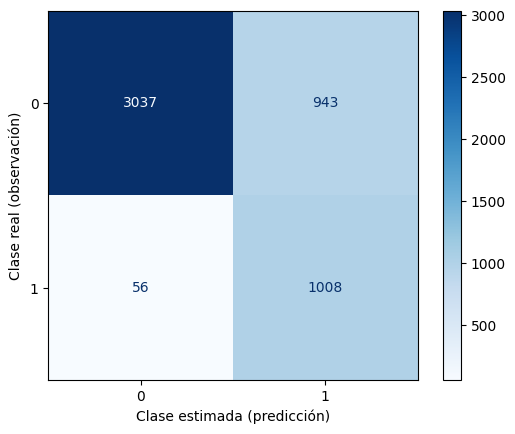

In [ ]:
#Matriz de Confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_c17.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

Verdaderos positivos (VP): 1008
Falsos positivos (FP): 943
Verdaderos negativos (VN): 3037
Falsos negativos (FN): 56


In [ ]:
#Tasa de error
Tasa_FP_17 = FP/(FP+VN)
Tasa_FN_17 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_17)
print("Error tipo II: %.2f" % Tasa_FN_17)

Error tipo I: 0.24
Error tipo II: 0.05


In [ ]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86      3980
           1       0.52      0.95      0.67      1064

    accuracy                           0.80      5044
   macro avg       0.75      0.86      0.76      5044
weighted avg       0.88      0.80      0.82      5044



In [ ]:
#Accuracy
SCORE_17 = modelo_c17.score(Xtest_sc,Ytest)
print("ACCURACY: %.2f" % SCORE_17)

#F1-Score
f1_17 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_17)

ACCURACY: 0.80
F1-Score: 0.67


   🟠  ¡Ahora es tu turno de interpretar los resultados!  🟠

####**Modelo 18**

✅ Paso 1 - Definición de variables: Utilizamos las variables $X$ e $Y$ previamente definidas y divididas en conjunto de entrenamiento y prueba.

✅ Paso 2 - Modelo: Creación del modelo SVM.

In [ ]:
pip install scikit-optimize

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
# Define el espacio de búsqueda de hiperparámetros
param_space = {
    'C': (0.1, 100.0, 'log-uniform'),  # Rango logarítmico para C
    'gamma': (0.001, 10.0, 'log-uniform'),  # Rango logarítmico para gamma
    'kernel': ['linear', 'rbf', 'poly'],  # Kernels lineal, RBF y polinómico
    'degree': (1, 5),  # Grado del kernel polinómico
    'coef0': (0.0, 1.0),  # Coeficiente independiente del kernel polinómico
}

# Crea un modelo SVM
modelo = SVC(class_weight='balanced')

# Realiza la búsqueda bayesiana de hiperparámetros
bayes = BayesSearchCV(
    modelo,
    param_space,
    n_iter=30,  # Número de iteraciones de la búsqueda bayesiana
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),  # Validación cruzada estratificada
    n_jobs=-1,  # Utiliza todos los núcleos del procesador
    verbose=0  # Nivel de verbosidad
)

# Ajusta el modelo SVM con los mejores hiperparámetros encontrados
bayes.fit(Xtrain_sc, Ytrain)

# Muestra los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
print(bayes.best_params_)

KeyboardInterrupt: ignored

In [ ]:
modelo_c18 = SVC(**bayes.best_params_,class_weight='balanced')

✅ Paso 3 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain y Ytrain.

In [ ]:
modelo_c18.fit(Xtrain_sc, Ytrain)

✅ Paso 4 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest. Como resultado obtenemos $\hat Y$ (Y_hat).

Se pone a prueba el modelo realizando una predicción con datos fuera de la muestra (out-of-sample).

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_c18.predict(Xtest_sc)

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas.

In [ ]:
#Matriz de Confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_c18.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

In [ ]:
#Tasa de error
Tasa_FP_18 = FP/(FP+VN)
Tasa_FN_18 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_18)
print("Error tipo II: %.2f" % Tasa_FN_18)

In [ ]:
#Metricas
print(classification_report(Ytest, Y_hat))

In [ ]:
#Accuracy
SCORE_18 = modelo_c18.score(Xtest_sc,Ytest)
print("ACCURACY: %.2f" % SCORE_18)

#F1-Score
f1_18 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_18)

   🟠  ¡Ahora es tu turno de interpretar los resultados!  🟠

### **6. Naive Bayes (NB)**

➡️ `Naive Bayes`: Es un conjunto de algoritmos basados en el teorema de Bayes que se utiliza para la clasificación supervisada. El enfoque "naive" asume independencia condicional entre las características, lo que significa que asume que las características son independientes dado el valor de la clase. Para clasificar clases discretas o categóricas, se utiliza el Naive Bayes Multinomial (MultinomialNB) o el Naive Bayes Bernoulli (BernoulliNB).

Bernoulli Naive Bayes (BernoulliNB): Este algoritmo es adecuado cuando tus características son binarias (0/1)

Multinomial Naive Bayes (MultinomialNB): Este algoritmo es adecuado cuando tus características tienen multiples clases (multiclase).

➡️ `BernoulliNB()`: Es un algoritmo de clasificación Naive Bayes que se utiliza cuando las características son binarias (0/1), lo que significa que cada característica puede tomar uno de dos valores posibles. Este algoritmo se basa en el modelo de distribución de Bernoulli, que es apropiado para datos binarios.

Parámetros:



> ●   `alpha` (valor predeterminado: 1.0): Este parámetro controla la suavización de Laplace (Laplace smoothing) aplicada a las frecuencias de las características binarias. Un valor más alto de alpha aumenta la suavización.

> ●   `binarize` (valor predeterminado: 0.0): Este parámetro establece el umbral para binarizar las características. Todas las características con valores iguales o mayores que binarize se establecen en 1, y todas las características con valores menores que binarize se establecen en 0.

> ●   `fit_prior` (valor predeterminado: True): Controla si se deben aprender las probabilidades a priori de clase a partir de los datos de entrenamiento. Si es True, se estimarán las probabilidades a priori; si es False, se utilizarán probabilidades a priori uniformes.

> ●   `class_prior` (valor predeterminado: None): Si se proporciona una lista de probabilidades a priori para las clases, este parámetro permite especificar las probabilidades a priori de clase en lugar de aprenderlas a partir de los datos de entrenamiento.

####**Modelo 19**



✅ Paso 1 - Definición de variables: Utilizamos las variables $X$ e $Y$ previamente definidas y divididas en conjunto de entrenamiento y prueba.

✅ Paso 2 - Modelo: Creación del modelo NB.


In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
modelo_c19 = BernoulliNB()

✅ Paso 3 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain y Ytrain.

In [ ]:
modelo_c19.fit(Xtrain_sc, Ytrain)

BernoulliNB()

✅ Paso 4 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest. Como resultado obtenemos $\hat Y$ (Y_hat).

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_c19.predict(Xtest_sc)

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas.

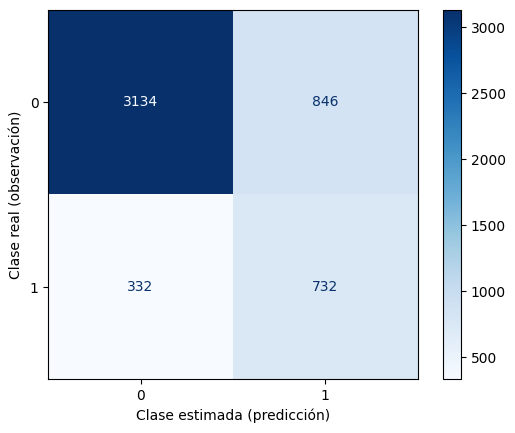

In [ ]:
#Matriz de Confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_c19.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

Verdaderos positivos (VP): 732
Falsos positivos (FP): 846
Verdaderos negativos (VN): 3134
Falsos negativos (FN): 332


In [ ]:
#Tasa de error
Tasa_FP_19 = FP/(FP+VN)
Tasa_FN_19 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_19)
print("Error tipo II: %.2f" % Tasa_FN_19)

Error tipo I: 0.21
Error tipo II: 0.31


In [ ]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      3980
           1       0.46      0.69      0.55      1064

    accuracy                           0.77      5044
   macro avg       0.68      0.74      0.70      5044
weighted avg       0.81      0.77      0.78      5044



In [ ]:
#Accuracy
SCORE_19 = modelo_c19.score(Xtest_sc,Ytest)
print("ACCURACY: %.2f" % SCORE_19)

#F1-Score
f1_19 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_19)

ACCURACY: 0.77
F1-Score: 0.55


   🟠  ¡Ahora es tu turno de interpretar los resultados!  🟠

####**Modelo 20**



✅ Paso 1 - Definición de variables: Utilizamos las variables $X$ e $Y$ previamente definidas y divididas en conjunto de entrenamiento y prueba.

✅ Paso 2 - Modelo: Creación del modelo NB.


In [ ]:
# Ajustar los pesos de clase en función del desequilibrio de clases
class_weights = {0: 0.1, 1: 0.9}
# Peso menor para la clase mayoritaria (0) y mayor peso para la clase minoritaria (1)

# Crear un modelo Bernoulli Naive Bayes con pesos de clase personalizados
modelo_c20 = BernoulliNB(class_prior=list(class_weights.values()))

✅ Paso 3 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain y Ytrain.

In [ ]:
modelo_c20.fit(Xtrain_sc, Ytrain)

BernoulliNB(class_prior=[0.1, 0.9])

✅ Paso 4 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest. Como resultado obtenemos $\hat Y$ (Y_hat).

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_c20.predict(Xtest_sc)

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas.

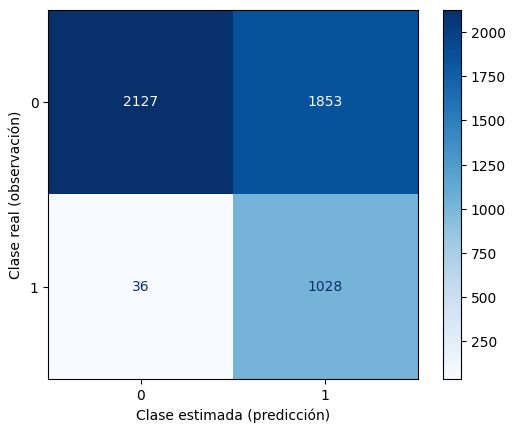

In [ ]:
#Matriz de Confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_c20.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

Verdaderos positivos (VP): 1028
Falsos positivos (FP): 1853
Verdaderos negativos (VN): 2127
Falsos negativos (FN): 36


In [ ]:
#Tasa de error
Tasa_FP_20 = FP/(FP+VN)
Tasa_FN_20 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_20)
print("Error tipo II: %.2f" % Tasa_FN_20)

Error tipo I: 0.47
Error tipo II: 0.03


In [ ]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       0.98      0.53      0.69      3980
           1       0.36      0.97      0.52      1064

    accuracy                           0.63      5044
   macro avg       0.67      0.75      0.61      5044
weighted avg       0.85      0.63      0.66      5044



In [ ]:
#Accuracy
SCORE_20 = modelo_c20.score(Xtest_sc,Ytest)
print("ACCURACY: %.2f" % SCORE_20)

#F1-Score
f1_20 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_20)

ACCURACY: 0.63
F1-Score: 0.52


   🟠  ¡Ahora es tu turno de interpretar los resultados!  🟠

####**Modelo 21**



✅ Paso 1 - Definición de variables: Utilizamos las variables $X$ e $Y$ previamente definidas y divididas en conjunto de entrenamiento y prueba.

✅ Paso 2 - Modelo: Creación del modelo NB.


In [ ]:
# Definir los hiperparámetros para optimizar
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],  # Valores posibles para el hiperparámetro alpha
}

# Ajustar los pesos de clase en función del desequilibrio de clases
class_weights = {0: 0.1, 1: 0.9}
# Peso menor para la clase mayoritaria (0) y mayor peso para la clase minoritaria (1)

# Crear un modelo Bernoulli Naive Bayes con pesos de clase personalizados
modelo = BernoulliNB(class_prior=list(class_weights.values()))

# Crear un objeto GridSearchCV para buscar los mejores hiperparámetros
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, scoring='f1', cv=5)

# Entrenar el modelo con búsqueda de hiperparámetros en los datos de entrenamiento
grid_search.fit(Xtrain_sc, Ytrain)

# Obtener el mejor modelo y los mejores hiperparámetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [ ]:
modelo_c21 = BernoulliNB(alpha=best_params['alpha'], class_prior=list(class_weights.values()))

✅ Paso 3 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain y Ytrain.

In [ ]:
modelo_c21.fit(Xtrain_sc, Ytrain)

BernoulliNB(alpha=0.5, class_prior=[0.1, 0.9])

✅ Paso 4 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest. Como resultado obtenemos $\hat Y$ (Y_hat).

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_c21.predict(Xtest_sc)

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas.

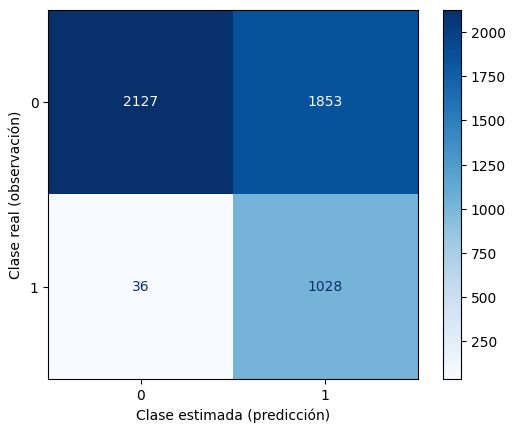

In [ ]:
#Matriz de Confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_c21.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

Verdaderos positivos (VP): 1028
Falsos positivos (FP): 1853
Verdaderos negativos (VN): 2127
Falsos negativos (FN): 36


In [ ]:
#Tasa de error
Tasa_FP_21 = FP/(FP+VN)
Tasa_FN_21 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_21)
print("Error tipo II: %.2f" % Tasa_FN_21)

Error tipo I: 0.47
Error tipo II: 0.03


In [ ]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       0.98      0.53      0.69      3980
           1       0.36      0.97      0.52      1064

    accuracy                           0.63      5044
   macro avg       0.67      0.75      0.61      5044
weighted avg       0.85      0.63      0.66      5044



In [ ]:
#Accuracy
SCORE_21 = modelo_c21.score(Xtest_sc,Ytest)
print("ACCURACY: %.2f" % SCORE_21)

#F1-Score
f1_21 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_21)

ACCURACY: 0.63
F1-Score: 0.52


   🟠  ¡Ahora es tu turno de interpretar los resultados!  🟠

# **3. SELECCIÓN DE MODELO**

✅ Una vez realizados todos los experimentos, se comparan los modelos para definir el modelo ganador con el que se trabajará.

In [ ]:
tabla = pd.DataFrame({'Métrica':['Error Tipo I:','Error Tipo II:','Accuracy:','F1-Score'],
                      'Regresión Logística':[Tasa_FP_4,Tasa_FN_4,SCORE_4,f1_4],
                      'Árbol de Decisión':[Tasa_FP_6,Tasa_FN_6,SCORE_6,f1_6],
                      'KNN':[Tasa_FP_10,Tasa_FN_10,SCORE_10,f1_10],
                      'Random Forest':[Tasa_FP_14,Tasa_FN_14,SCORE_14,f1_14],
                      'SVM':[Tasa_FP_17,Tasa_FN_17,SCORE_17,f1_17],
                      'Naive Bayes':[Tasa_FP_21,Tasa_FN_21,SCORE_21,f1_21]})

# Tabla resultante
tabla

,Métrica,Regresión Logística,Árbol de Decisión,KNN,Random Forest,SVM,Naive Bayes
0,Error Tipo I:,0.205779,0.087186,0.086181,0.112312,0.236935,0.465578
1,Error Tipo II:,0.049812,0.144737,0.424812,0.139098,0.052632,0.033835
2,Accuracy:,0.827121,0.900674,0.842387,0.882038,0.801943,0.625496
3,F1-Score,0.698687,0.784145,0.606241,0.754841,0.668657,0.521166


In [ ]:
import joblib

# Guardar el modelo en un archivo
joblib.dump(modelo_c6, 'modelo_clasificacion.pkl')

['modelo_clasificacion.pkl']



---


# **4. PRONÓSTICO**

✅ Para probar el poder de generallización del modelo ganador, se pueden utilizar datos nuevos reales de las variables $X$ con las características de otras casas para predecir el valor de $Y$, para comprobar si se acerca al valor real del Precio en UF de casas a la venta en la RM.


### **4.1. Datos simulados**

Si no se tienen datos reales, se pueden generar valores aleatorios sintéticos de $X$ para realizar un pronóstico. Para esto se define una función para generar numeros aleatorios dentro del rango de las variables explicativas $X$, utilizando el minimo y el maximo del dataset original:

In [ ]:
import numpy as np # Programación vectorial
import pandas as pd # Estructura y manipulación de datos
import random # Generación de números aleatorios

In [ ]:
# Importación del dataset preprocesado
df = pd.read_excel("Guia_Machine_Learning_Preprocesado.xlsx")
X = df.drop(columns=['Estado','Precio_CLP'])
X.sample(5)

,Precio_UF,Comuna,N_Habitaciones,N_Baños,Superficie_Construida_M2,Total_Superficie_M2,N_Estacionamientos
5062,2700.0,36,4,1,72,98.0,2
654,10800.0,18,4,3,136,360.0,3
3266,5090.0,28,3,2,90,180.0,2
7499,6180.0,20,3,4,133,229.0,5
395,6000.0,7,4,4,200,200.0,0


In [ ]:
#Función para generar variables X dentro de los rangos minimos y maximos:
def generate_random_data(num_rows):
    np.random.seed(123) #Puedes quitar la semilla para probar con distintos resultados aleatorios
    random_data = {
        key: np.random.randint(low, high, size=num_rows) for key, low, high in [
            ('Comuna', X['Comuna'].min(), X['Comuna'].max()+1),
            ('N_Habitaciones', X['N_Habitaciones'].min(), X['N_Habitaciones'].max()+1),
            ('N_Baños', X['N_Baños'].min(), X['N_Baños'].max()+1),
            ('Superficie_Construida_M2', X['Superficie_Construida_M2'].min(), X['Superficie_Construida_M2'].max()+1),
            ('Total_Superficie_M2', X['Total_Superficie_M2'].min(), X['Total_Superficie_M2'].max()+1),
            ('N_Estacionamientos',X['N_Estacionamientos'].min(), X['N_Estacionamientos'].max()+1),
            ('Precio_UF',X['Precio_UF'].min(), X['Precio_UF'].max()+1)
        ]
    }

    X_rand = pd.DataFrame(random_data)

    return X_rand

In [ ]:
# Uso de la función para generar un DataFrame con X filas
X_rand = generate_random_data(10) #Puedes cambiar el numero para probar con más registros
X_rand.head(10)

,Comuna,N_Habitaciones,N_Baños,Superficie_Construida_M2,Total_Superficie_M2,N_Estacionamientos,Precio_UF
0,45,1,4,3,631,3,20839
1,2,2,3,40,412,3,17334
2,28,7,2,323,291,5,22471
3,34,8,1,85,589,4,17537
4,38,2,1,48,107,4,8747
5,17,1,1,177,577,5,3258
6,19,7,1,136,419,3,9573
7,42,1,2,100,395,2,8887
8,22,8,4,181,147,0,6578
9,33,2,4,214,485,4,10196


✅ Predicción de la variable objetivo $Y$ usando el modelo ganador:

In [ ]:
# Cargar el modelo desde el archivo
clasificacion = joblib.load('modelo_clasificacion.pkl')

In [ ]:
# Pronóstico de la variable objetivo usando el modelo ganador
Y_hat = clasificacion.predict(X_rand)

In [ ]:
# Crear un DataFrame a partir de las predicciones Y_hat
resultados = pd.DataFrame(X_rand)
resultados['Pronostico'] = Y_hat
resultados

,Comuna,N_Habitaciones,N_Baños,Superficie_Construida_M2,Total_Superficie_M2,N_Estacionamientos,Precio_UF,Pronostico
0,45,1,4,3,631,3,20839,0
1,2,2,3,40,412,3,17334,0
2,28,7,2,323,291,5,22471,0
3,34,8,1,85,589,4,17537,0
4,38,2,1,48,107,4,8747,0
5,17,1,1,177,577,5,3258,0
6,19,7,1,136,419,3,9573,0
7,42,1,2,100,395,2,8887,0
8,22,8,4,181,147,0,6578,0
9,33,2,4,214,485,4,10196,0


In [ ]:
# Exportar los resultados a un archivo Excel
resultados.to_excel('resultados_clasificacion.xlsx', index=False)
# index=False para no incluir el índice en el archivo

---
---
# **DOCUMENTACIÓN**

Numpy: https://numpy.org/devdocs/user/index.html#user

Pandas: https://pandas.pydata.org/docs/user_guide/index.html

Matplotlib: https://matplotlib.org/stable/users/index.html

Seaborn: https://seaborn.pydata.org/tutorial.html

Scikit-learn: https://scikit-learn.org/stable/user_guide.html

Statsmodels: https://www.statsmodels.org/stable/user-guide.html